In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,12)
import seaborn as sns
from scipy import stats
from scipy.stats import skew
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import keras.layers
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
#change directory 

xls = pd.ExcelFile(os.path.join(r"C:\Users\hassa\Desktop\Uni\Autumn '21\CSCI316\Assignments\Assignment 2-20211115\AllStatesAndTerritoriesQTR4FY21.xlsx"), engine='openpyxl')

In [3]:
df = pd.concat(pd.read_excel(xls, sheet_name=None), ignore_index=True)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130958 entries, 0 to 130957
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   State              130958 non-null  object        
 1   Agency Name        130958 non-null  object        
 2   NSN                130958 non-null  object        
 3   Item Name          130958 non-null  object        
 4   Quantity           130958 non-null  int64         
 5   UI                 130958 non-null  object        
 6   Acquisition Value  130958 non-null  float64       
 7   DEMIL Code         130958 non-null  object        
 8   DEMIL IC           121048 non-null  float64       
 9   Ship Date          130958 non-null  datetime64[ns]
 10  Station Type       130958 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 11.0+ MB


In [5]:
df.isnull().sum()

State                   0
Agency Name             0
NSN                     0
Item Name               0
Quantity                0
UI                      0
Acquisition Value       0
DEMIL Code              0
DEMIL IC             9910
Ship Date               0
Station Type            0
dtype: int64

In [6]:
df.shape

(130958, 11)

In [7]:
df.describe()

,Quantity,Acquisition Value,DEMIL IC
count,130958.000000,1.309580e+05,121048.000000
mean,4.180233,1.316023e+04,1.242978
std,31.187727,1.371933e+05,1.016147
min,0.000000,0.000000e+00,0.000000
25%,1.000000,1.380000e+02,1.000000
50%,1.000000,4.990000e+02,1.000000
75%,1.000000,7.490000e+02,1.000000
max,5000.000000,2.200000e+07,7.000000


In [8]:
df['Item Name'].value_counts()
#4797 unique items

RIFLE,5.56 MILLIMETER                  46843
RIFLE,7.62 MILLIMETER                  11146
SIGHT,REFLEX                           10899
PISTOL,CALIBER .45,AUTOMATIC            5664
TRUCK,UTILITY                           2634
                                       ...  
TANK,FABRIC,COLLAPSIBLE                    1
DONGLE                                     1
COMMUNICATION EQP                          1
INSTALLATION KIT,JETTISON FUEL TANK        1
DIRECTION FINDER SET                       1
Name: Item Name, Length: 4797, dtype: int64

In [9]:
df['Agency Name'].value_counts()

TEHAMA CSO                             1402
LAW ENFORCEMENT DIVISION               1177
OAKLAND COUNTY  SHERIFF OFFICE         1147
STATE HWY PATROL                       1033
LOS ANGELES POLICE DEPARTMENT           924
                                       ... 
CENTRAL POLICE DEPTMENT                   1
VERNDALE POLICE DEPT                      1
PEMBERVILLE POLICE DEPT                   1
CLEBURNE POLICE DEPT                      1
YAVAPAI COUNTY SHERIFF OFFICE             1
Name: Agency Name, Length: 5632, dtype: int64

In [10]:
df['State'].value_counts(), df['State'].nunique()

(CA    9489
 TX    8876
 SC    7651
 OH    7636
 IL    6284
 TN    6203
 AL    6155
 MI    5796
 GA    5581
 MN    5062
 IN    4514
 FL    4239
 KY    3842
 NJ    3810
 WI    3618
 AZ    3590
 MO    3127
 NC    2693
 CO    2466
 VA    2379
 AR    2294
 PA    2186
 LA    1913
 MD    1659
 WA    1607
 OK    1502
 CT    1291
 ND    1265
 IA    1106
 ME    1026
 WV    1019
 MA     967
 UT     958
 NY     955
 OR     853
 ID     839
 MS     729
 MT     712
 KS     693
 SD     687
 NV     637
 NH     517
 WY     399
 RI     373
 NM     300
 PR     293
 NE     281
 DE     258
 AK     208
 VT     181
 GU     162
 MP      72
 VI       5
 Name: State, dtype: int64,
 53)

In [11]:
df['Quantity'].unique()

array([  10,    1,    9,   12,    3,    5,   11,    2,   13,    6,   20,
          4,   84,   15,   90,   30,   42,   38,   39,    8,  250,   35,
          7,   25,  100,   27,  120,   32,   50,   70,   40,   16,   17,
         14,   26,   18,   61,  340,   19,   31,   45,   21,   28,   75,
         43,  223,   37,   60,   36,   66,  311,   22,  170,   24,   33,
         73,   23,  200,   82,   63,   58,   88,  104,   80,   55,   85,
         97,   34,  361,   62,  300,  260,   72,  600,   29,   95,  178,
         71,  185, 1110,   65,  149,  627,  138,  219,   47,   78,  160,
         74,  131,  291, 1472,  168,  405,   81,   79,   41,   49,  698,
        133,  700,   89,   48,  102,  500,  113,  161, 2000,  189,   44,
        150,  192,  141, 2004,  324, 1000,  352,   46,  691,   96,   51,
        180,   52,   54,  140,   57,  290,   69,   59,  329,  124,  400,
        135,  299,  900, 1298,  370,  137,  451,   68,  312, 2040,  188,
        111,  279,  134,  195,  316,  107,  144,  1

(array(['Kit', 'Each', 'Set', 'Box', 'Assembly', 'Pair', 'Unknown', 'Reel',
        'Plate', 'Package', 'Pad', 'Sheet', 'Roll', 'Gross', 'Foot',
        'Spool', 'Board Foot', 'Yard', 'Hundred', 'Dozen', 'Assortment',
        'Pound', 'Coil', 'Case', 'Bag', 'Thousand', 'Bale', 'Bundle',
        'Outfit', 'Can', 'Bottle', 'Cartridge'], dtype=object),
 Each          125920
 Kit             1747
 Pair             944
 Set              653
 Box              532
 Package          447
 Assembly         211
 Roll             136
 Dozen            121
 Hundred           42
 Unknown           32
 Sheet             31
 Reel              22
 Foot              20
 Case              19
 Spool             16
 Assortment        11
 Thousand           9
 Bag                9
 Bale               6
 Yard               4
 Plate              4
 Outfit             4
 Coil               4
 Pound              3
 Board Foot         3
 Can                2
 Bundle             2
 Gross              1
 Bottle   

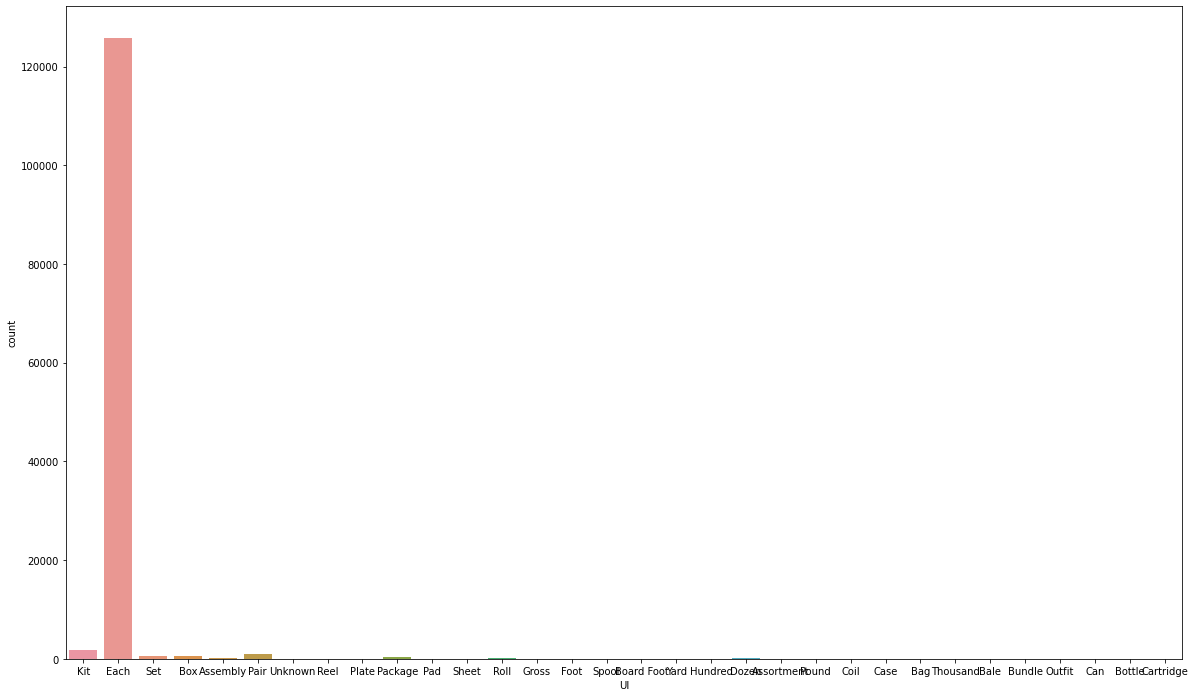

In [12]:
df['UI'].unique(), df['UI'].value_counts(), sns.countplot(x = 'UI', data = df)

(array([ 1., nan,  3.,  7.,  6.,  0.,  4.,  5.]),
 1.0    112444
 NaN      9910
 3.0      5406
 7.0      2891
 6.0       250
 0.0        42
 4.0        14
 5.0         1
 Name: DEMIL IC, dtype: int64,
 <AxesSubplot:xlabel='DEMIL IC', ylabel='count'>)

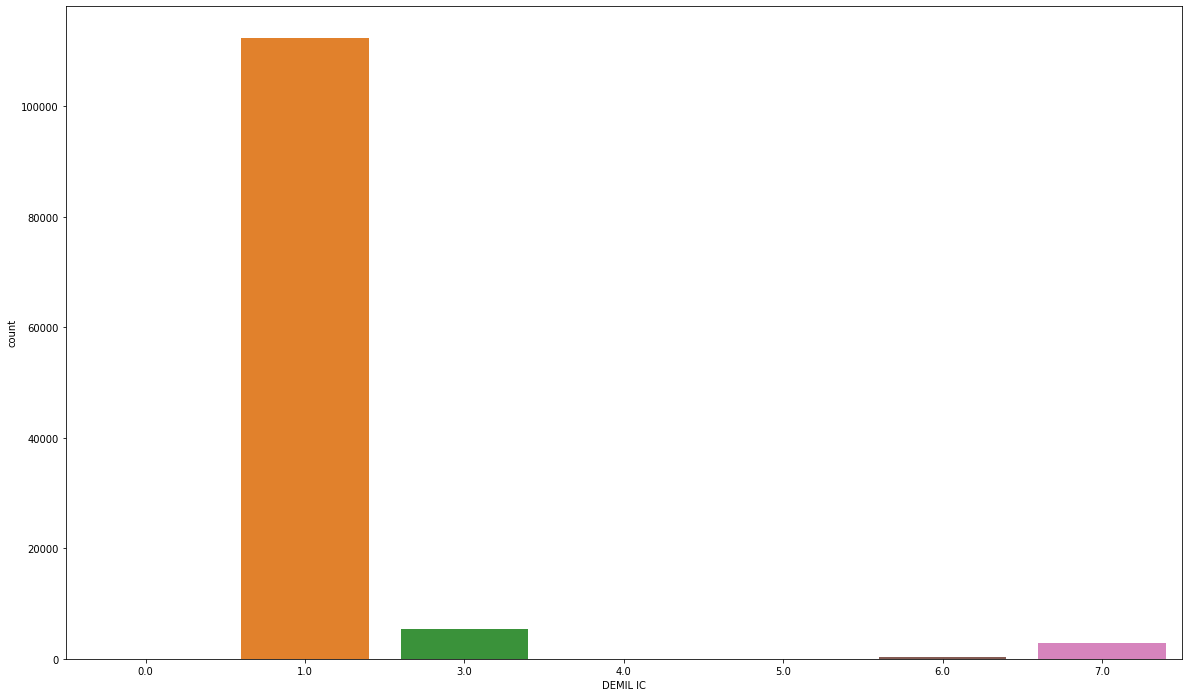

In [13]:
df['DEMIL IC'].unique(), df['DEMIL IC'].value_counts(dropna=False), sns.countplot(x = 'DEMIL IC', data = df)

(array(['D', 'C', 'Q', 'F', 'A', 'B', 'E'], dtype=object),
 D    93478
 A    18312
 C     7012
 F     6198
 Q     5658
 B      156
 E      144
 Name: DEMIL Code, dtype: int64,
 <AxesSubplot:xlabel='DEMIL Code', ylabel='count'>)

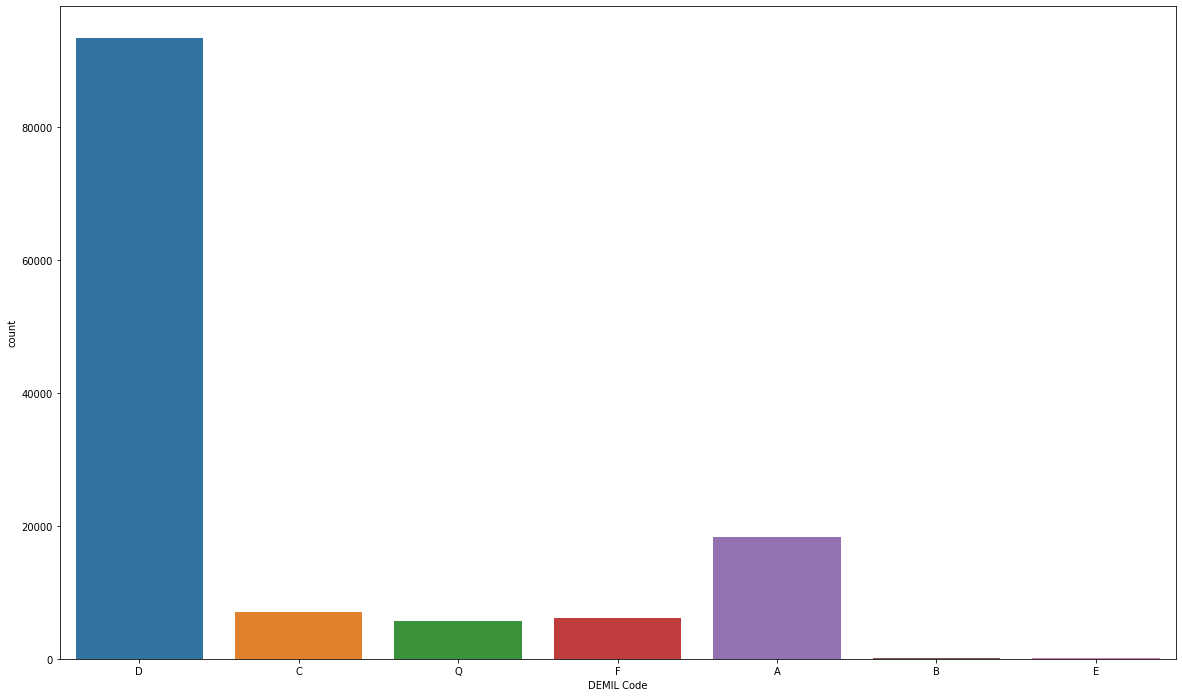

In [14]:
df['DEMIL Code'].unique(), df['DEMIL Code'].value_counts(), sns.countplot(x = 'DEMIL Code', data = df)

#convert into labels

In [15]:
df['Total Cost'] = df['Quantity'] * df['Acquisition Value']
df

,State,Agency Name,NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,Station Type,Total Cost
0,AL,ABBEVILLE POLICE DEPT,2540-01-565-4700,BALLISTIC BLANKET KIT,10,Kit,15871.59,D,1.0,2018-01-30,State,158715.90
1,AL,ABBEVILLE POLICE DEPT,1240-DS-OPT-SIGH,OPTICAL SIGHTING AND RANGING EQUIPMENT,1,Each,245.88,D,NaN,2016-06-02,State,245.88
2,AL,ABBEVILLE POLICE DEPT,2355-01-553-4634,MINE RESISTANT VEHICLE,1,Each,658000.00,C,1.0,2016-11-09,State,658000.00
3,AL,ABBEVILLE POLICE DEPT,1240-01-411-1265,"SIGHT,REFLEX",9,Each,333.00,D,1.0,2016-09-14,State,2997.00
4,AL,ABBEVILLE POLICE DEPT,5855-01-577-7174,"ILLUMINATOR,INFRARED",10,Each,926.00,D,1.0,2017-03-28,State,9260.00
...,...,...,...,...,...,...,...,...,...,...,...,...
130953,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,State,138.00
130954,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,State,138.00
130955,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,State,138.00
130956,WY,WESTON COUNTY SHERIFF'S OFFICE,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.00,D,1.0,1993-09-01,State,138.00


In [16]:
df['Ship Year'] = df['Ship Date'].dt.year

## Number of shipments/transactions per year

(2012    15648
 2021    11786
 2011    11521
 2020    10026
 2014     9396
 2013     6702
 2017     5341
 2002     5307
 2010     4535
 2016     4342
 2015     4241
 2003     4067
 2018     3661
 2005     3634
 1998     3609
 2004     3220
 2019     3157
 2006     3137
 2008     2416
 2000     2320
 1999     2208
 2009     2104
 1997     1770
 2007     1759
 1996     1452
 1994     1104
 1995     1047
 2001      738
 1993      466
 1990      167
 1991       73
 1992        3
 1980        1
 Name: Ship Year, dtype: int64,
 <AxesSubplot:xlabel='Ship Year', ylabel='count'>)

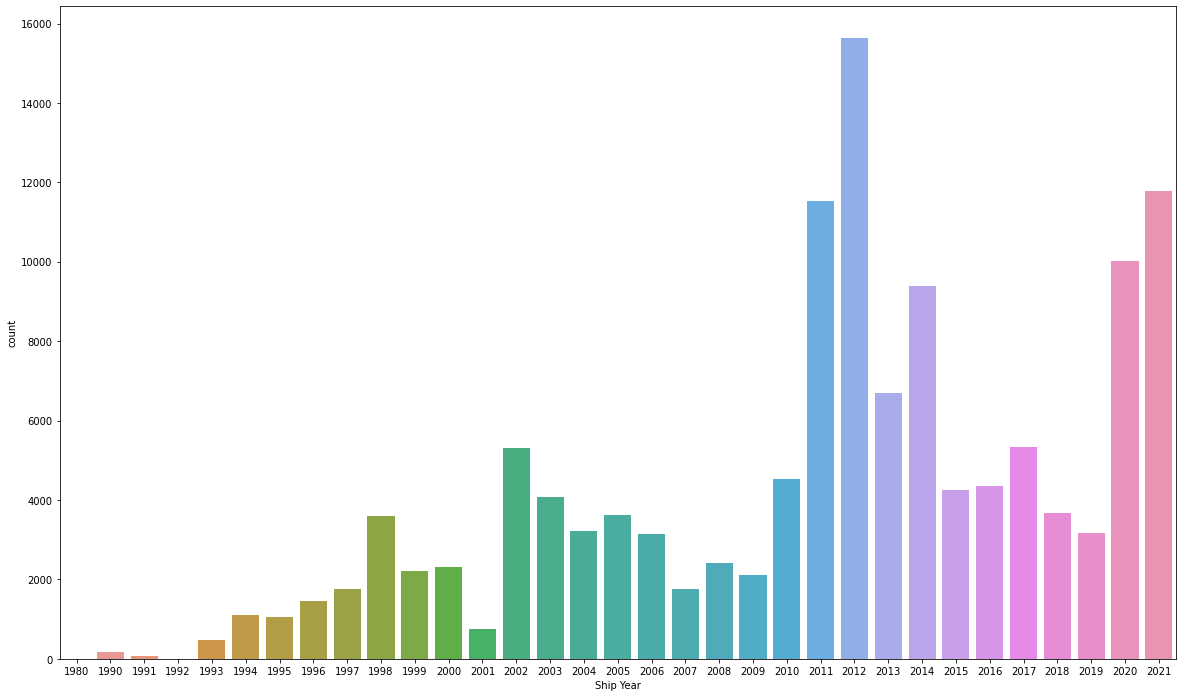

In [17]:
df['Ship Year'].value_counts(), sns.countplot(x = 'Ship Year', data = df)

#Make comment on trends - WHY 

In [18]:
df = df[["State", "Agency Name", "NSN", "Item Name", "Quantity", "UI", "Acquisition Value", "Total Cost", "DEMIL Code", "DEMIL IC", "Ship Date", "Ship Year", "Station Type" ]]

## Total number of shipments per year (as opposed to max) 

In [19]:
pd.set_option('display.float_format', '{:.2f}'.format)

total_cost_yearly = df.groupby(["Ship Year"], as_index=False)[['Total Cost']].agg('sum')

total_cost_yearly = total_cost_yearly.sort_values(by=['Total Cost'], ascending = False)

total_cost_yearly

,Ship Year,Total Cost
25,2014,385103714.39
27,2016,247876774.04
24,2013,180440090.67
30,2019,152190512.54
31,2020,149998486.06
26,2015,149032923.14
32,2021,148734565.57
28,2017,129513354.68
23,2012,95218039.30
29,2018,81980104.96


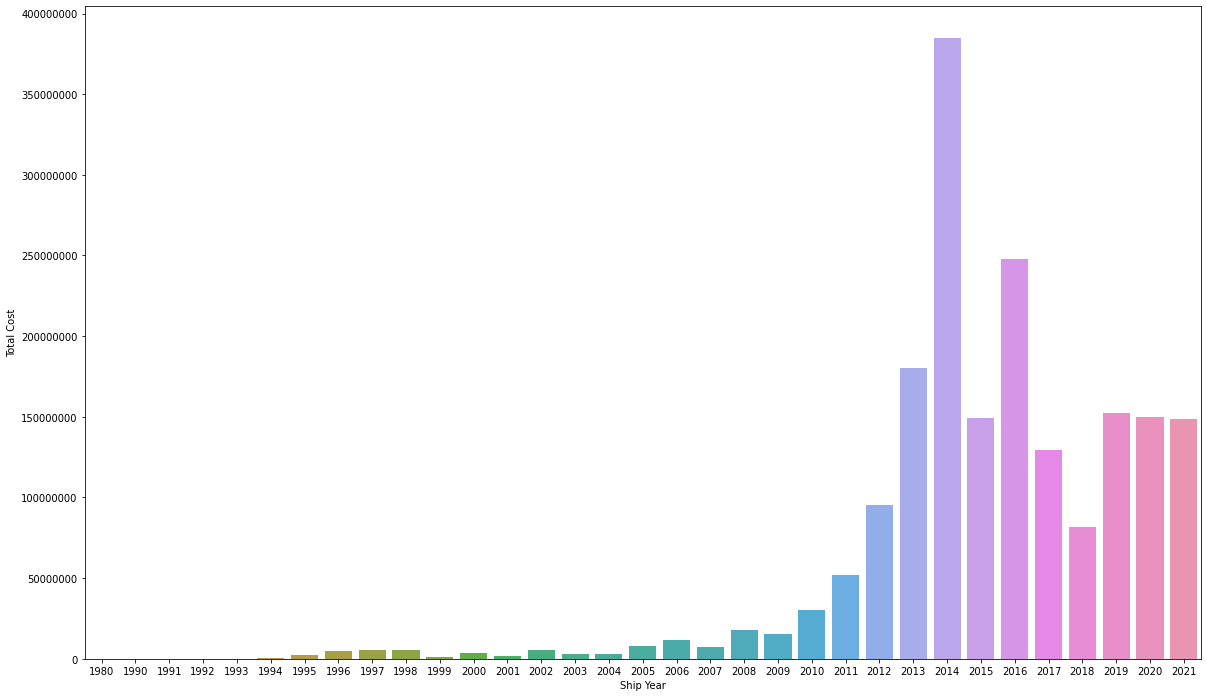

In [20]:
#Showing the total amount spent per year

ax = sns.barplot(x="Ship Year", y="Total Cost", data=total_cost_yearly)
ax.yaxis.get_major_formatter().set_scientific(False)

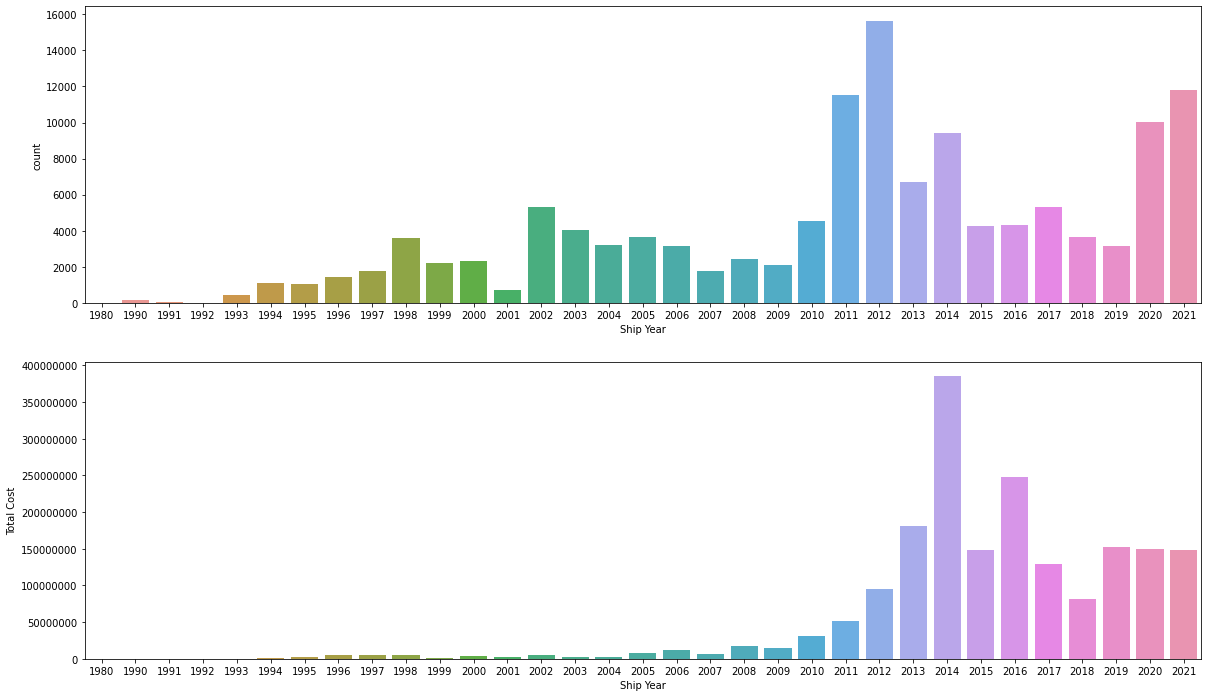

In [21]:
#Total transactions per year vs total cost per year

plt.subplot(2,1,1)
sns.countplot(x = 'Ship Year', data = df)

plt.subplot(2,1,2)
ax = sns.barplot(x="Ship Year", y="Total Cost", data=total_cost_yearly)
ax.yaxis.get_major_formatter().set_scientific(False)

### Showing the all time spending by each state

In [22]:
pd.set_option('display.float_format', '{:.2f}'.format)

all_time_cost_by_state = df.groupby(["State"], as_index=False)[['Total Cost']].agg('sum')

all_time_cost_by_state = all_time_cost_by_state.sort_values(by=['Total Cost'], ascending = False)

#Top 10 highest spending states of all time
all_time_cost_by_state.head(10)

,State,Total Cost
44,TX,154744237.13
4,CA,154561125.85
43,TN,134388805.89
8,FL,104093526.23
3,AZ,95379145.11
1,AL,92107774.13
41,SC,81317235.56
9,GA,67776492.17
35,OH,67700702.77
27,NC,57186636.86


Text(0, 0.5, 'Total Cost')

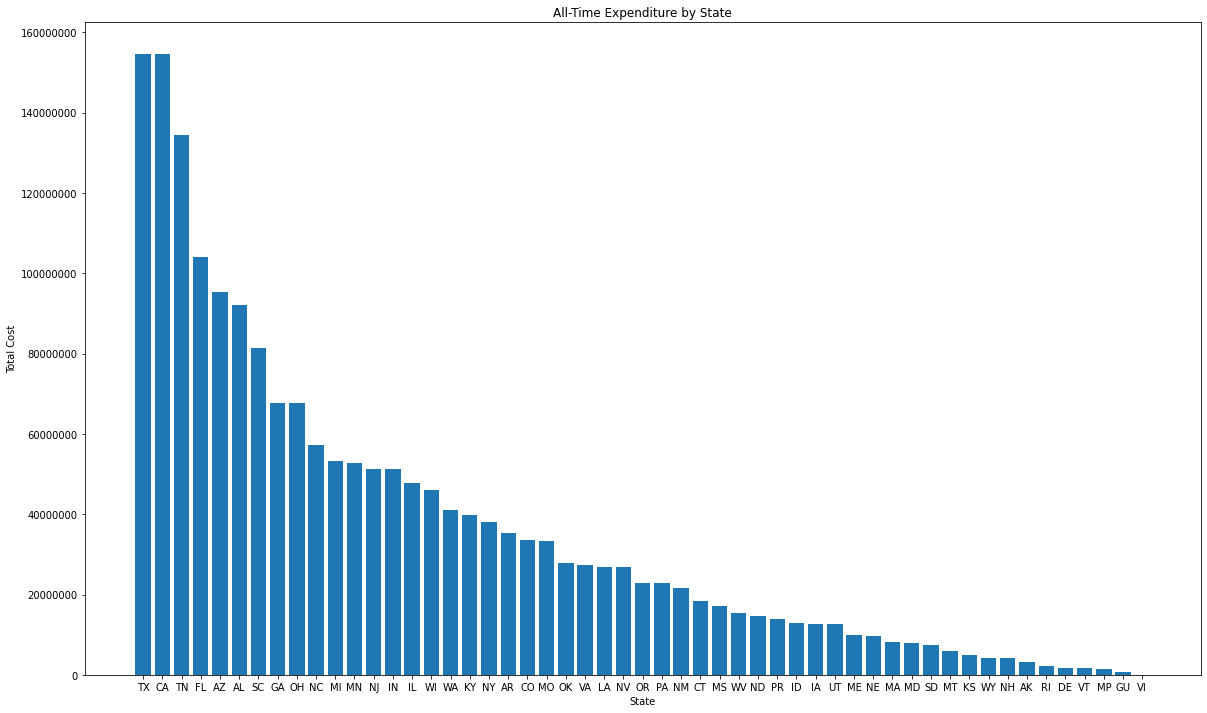

In [23]:
#All time spending by states

plt.bar(all_time_cost_by_state['State'], all_time_cost_by_state['Total Cost'])

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.title("All-Time Expenditure by State")
plt.xlabel("State")
plt.ylabel("Total Cost")

### The top 5 states are: Texas, California, Tennesee, Florida and Arizona. 

### Let's check what their spending patterns are per year

In [24]:
# ax = sns.barplot(x="Ship Year", y="Total Cost", data=df[["State"] == 'TX'], dodge=False)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.yaxis.get_major_formatter().set_scientific(False)

# yearly_state_spending = df.groupby(["State", "Ship Year"], as_index=False)[['Total Cost']].agg('sum')

# yearly_state_spending = yearly_state_spending.sort_values(by=['Total Cost'], ascending = False)

# yearly_state_spending.head(50)

top_5_spenders = df[(df["State"] == 'TX') | (df["State"] == 'CA') | (df["State"] == 'TN') | (df["State"] == 'FL') | (df["State"] == 'AZ')]
top_5_spenders = top_5_spenders.groupby(['Ship Year','State'],  as_index=False)[['Total Cost']].agg('sum')
top_5_spenders

,Ship Year,State,Total Cost
0,1992,AZ,7261.80
1,1993,TX,552.00
2,1994,CA,137761.00
3,1994,FL,1656.00
4,1994,TX,4140.00
...,...,...,...
131,2021,AZ,5126819.90
132,2021,CA,11049901.53
133,2021,FL,4826982.84
134,2021,TN,12440248.58


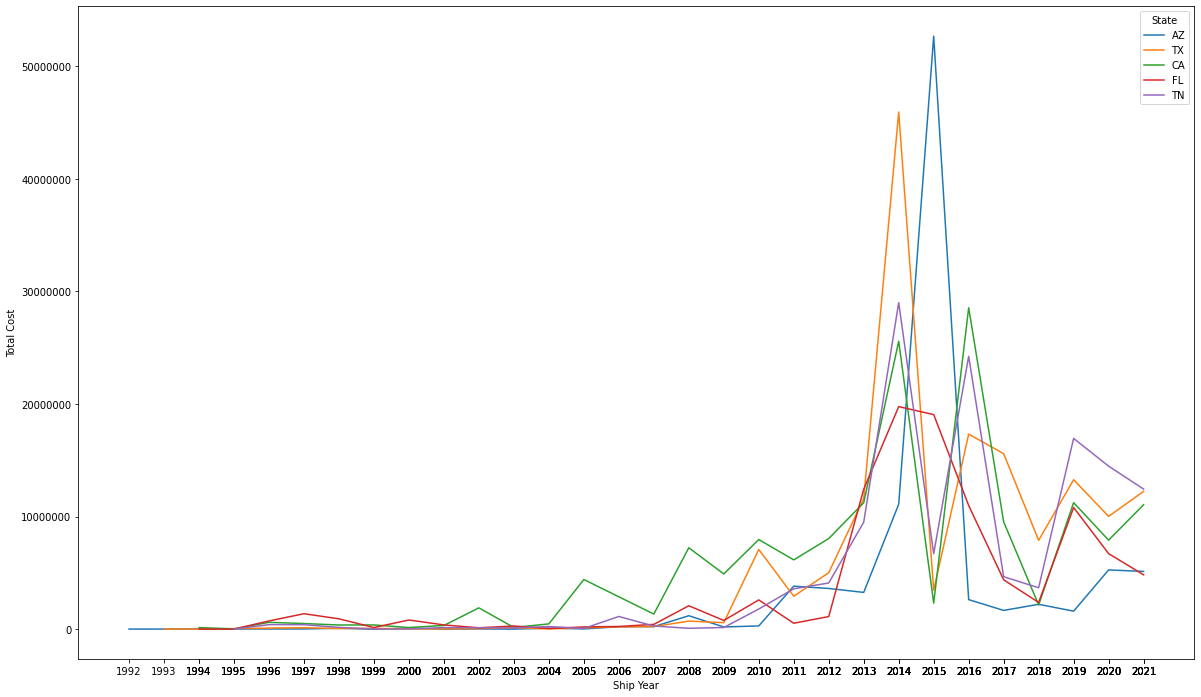

In [25]:
ax = sns.lineplot(data=top_5_spenders, x="Ship Year", y="Total Cost", hue='State')

ax.set(xticks=top_5_spenders['Ship Year'])
ax.yaxis.get_major_formatter().set_scientific(False)

### And we look at the states which had the highest spending per year

In [26]:
pd.set_option('display.float_format', '{:.2f}'.format)

max_cost_by_state_yearly = df.groupby(["State", "Ship Year"], as_index=False)[['Total Cost']].agg('sum')

max_cost_by_state_yearly = max_cost_by_state_yearly.sort_values(by=['Total Cost'], ascending = False)

max_cost_by_state_yearly

,State,Ship Year,Total Cost
83,AZ,2015,52670220.25
1085,TX,2014,45932322.80
884,OH,2014,30971252.95
1057,TN,2014,29002086.40
111,CA,2016,28547644.34
...,...,...,...
752,NH,1995,138.00
910,OR,1993,138.00
1153,VT,2010,120.00
177,DE,2002,117.42


In [27]:
max_cost_by_state_yearly = max_cost_by_state_yearly.drop_duplicates(subset = 'Ship Year') .sort_values(by=['Ship Year'])

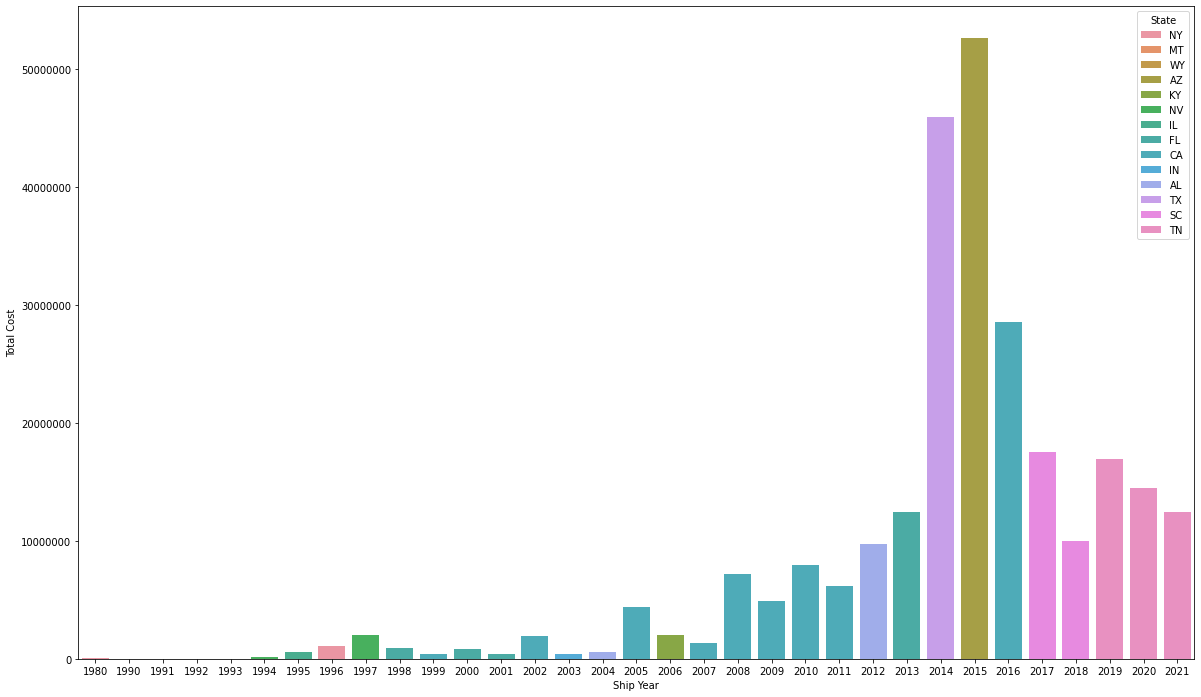

In [28]:
# Showing which state spent the most per year

ax = sns.barplot(x="Ship Year", y="Total Cost", hue="State", data=max_cost_by_state_yearly, dodge=False)
ax.yaxis.get_major_formatter().set_scientific(False)

## Looking at Items

### Which items resulted in most total cost (all-time)

In [29]:
#Acquisition by items

acquisition_by_items = df.groupby(["Item Name"], as_index=False)[['Total Cost']].agg('sum')

acquisition_by_items = acquisition_by_items.sort_values(by=['Total Cost'], ascending = False)

acquisition_by_items.head(50)

,Item Name,Total Cost
2554,MINE RESISTANT VEHICLE,774306179.18
4503,"TRUCK,UTILITY",186497971.74
80,"AIRCRAFT, FIXED WING",98736000.00
4554,"UNMANNED VEHICLE,GROUND",74245170.73
1887,"HELICOPTER,UTILITY",40586380.00
2006,"IMAGE INTENSIFIER,NIGHT VISION",33567149.02
1886,"HELICOPTER,OBSERVATION",33245370.00
2590,MK3MOD0,23787520.00
2743,ONLY COMPLETE COMBAT/ASSAULT/TACTICAL WHEELED ...,23200894.00
3374,"RIFLE,5.56 MILLIMETER",21458690.90


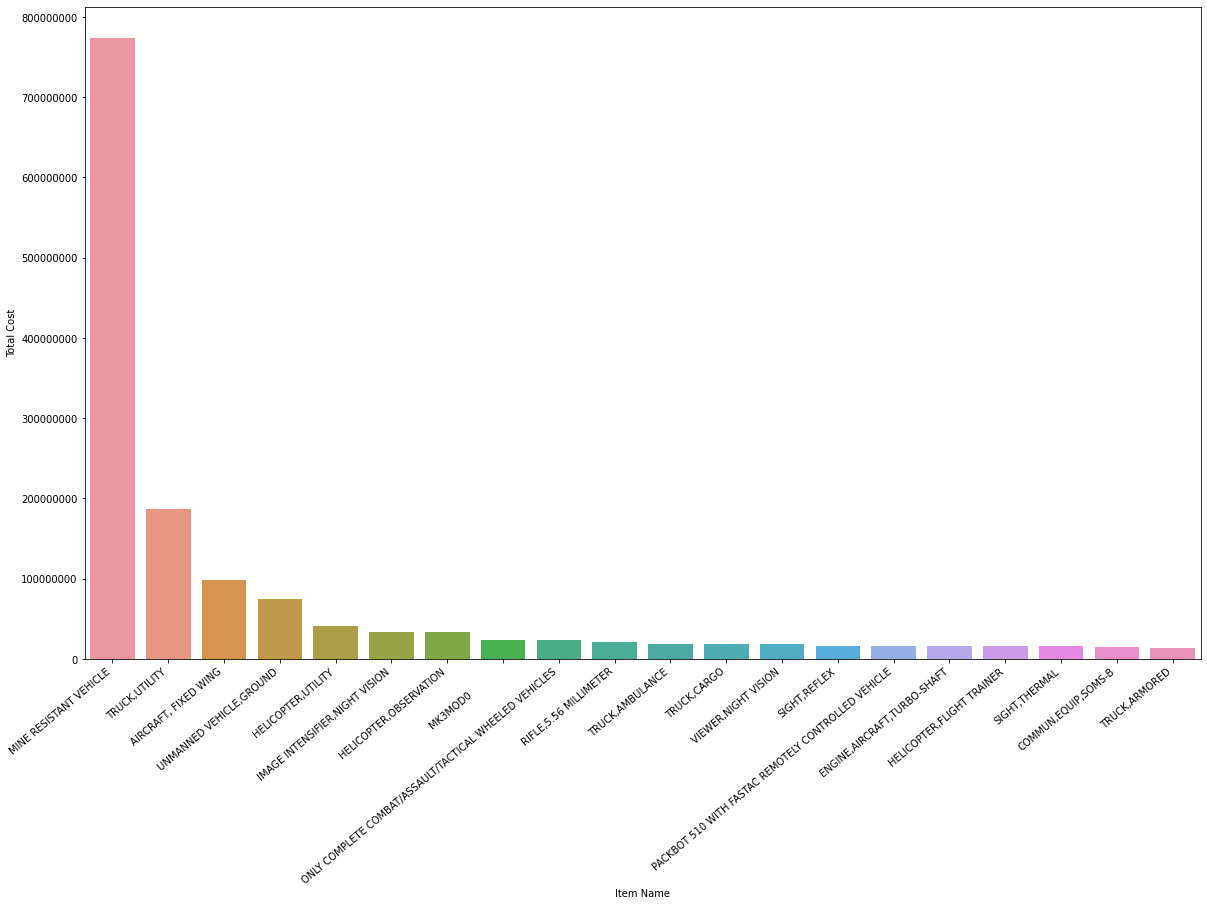

In [30]:
#Most profitable items of all time (top 20)

ax = sns.barplot(x="Item Name", y="Total Cost", data=acquisition_by_items[0:20], dodge=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.yaxis.get_major_formatter().set_scientific(False)

### Mine Resistant Vehicle (MRV) is leages above the rest, so let's look at it a bit more

In [31]:
# single_item = df.groupby(['Item Name', 'Ship Year']).size()
# single_item

mrv = df[df["Item Name"] == 'MINE RESISTANT VEHICLE']
mrv.groupby(['Item Name', 'Ship Year'],  as_index=False)[['Quantity']].agg('sum')


,Item Name,Ship Year,Quantity
0,MINE RESISTANT VEHICLE,2009,1
1,MINE RESISTANT VEHICLE,2013,187
2,MINE RESISTANT VEHICLE,2014,420
3,MINE RESISTANT VEHICLE,2016,204
4,MINE RESISTANT VEHICLE,2017,56
5,MINE RESISTANT VEHICLE,2018,36
6,MINE RESISTANT VEHICLE,2019,153
7,MINE RESISTANT VEHICLE,2020,60
8,MINE RESISTANT VEHICLE,2021,24


### It had the highest distribution in 2014, followed by 2016 and 2013. 

### If we look back to the total cost by year graph, we'll see 2014 was the year with the highest expenditure as well followed by 2016 and 2013

### Now, looking at most profitable item by year...

In [32]:
acquisition_by_items_yearly = df.groupby(["Item Name", "Ship Year"], as_index=False)[['Total Cost']].agg('sum')

acquisition_by_items_yearly = acquisition_by_items_yearly.sort_values(by=['Total Cost'], ascending = False)

acquisition_by_items_yearly.head(50)

,Item Name,Ship Year,Total Cost
4762,MINE RESISTANT VEHICLE,2014,301821000.00
4763,MINE RESISTANT VEHICLE,2016,148403764.00
4761,MINE RESISTANT VEHICLE,2013,107799863.00
4766,MINE RESISTANT VEHICLE,2019,100116120.00
146,"AIRCRAFT, FIXED WING",2015,68009000.00
8529,"TRUCK,UTILITY",2012,43387884.40
4767,MINE RESISTANT VEHICLE,2020,42237734.00
4764,MINE RESISTANT VEHICLE,2017,36880764.00
8530,"TRUCK,UTILITY",2013,30695800.80
8531,"TRUCK,UTILITY",2014,27011717.00


In [33]:
acquisition_by_items_yearly = acquisition_by_items_yearly.drop_duplicates(subset = 'Ship Year').sort_values(by=['Ship Year'])

In [34]:
acquisition_by_items_yearly

,Item Name,Ship Year,Total Cost
8428,"TRUCK,ARMORED",1980,65070.00
6360,"RIFLE,7.62 MILLIMETER",1990,23046.00
6361,"RIFLE,7.62 MILLIMETER",1991,10074.00
6939,SIGHT,1992,7261.80
6362,"RIFLE,7.62 MILLIMETER",1993,63618.00
8429,"TRUCK,ARMORED",1994,260280.00
3447,"HELICOPTER,OBSERVATION",1995,855558.00
3448,"HELICOPTER,OBSERVATION",1996,2434995.00
3467,"HELICOPTER,UTILITY",1997,2768112.00
5213,ONLY COMPLETE COMBAT/ASSAULT/TACTICAL WHEELED ...,1998,1950000.00


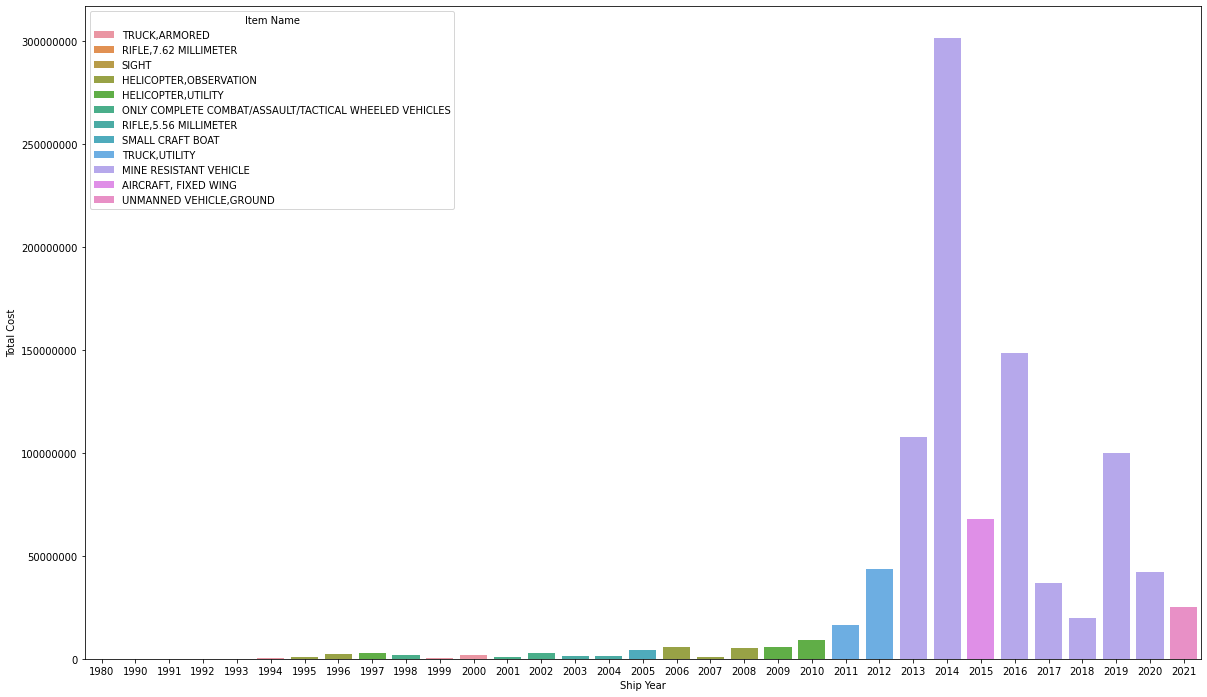

In [35]:
#Most profitable items per year

ax = sns.barplot(x="Ship Year", y="Total Cost", hue = "Item Name", data=acquisition_by_items_yearly, dodge=False)
ax.yaxis.get_major_formatter().set_scientific(False)

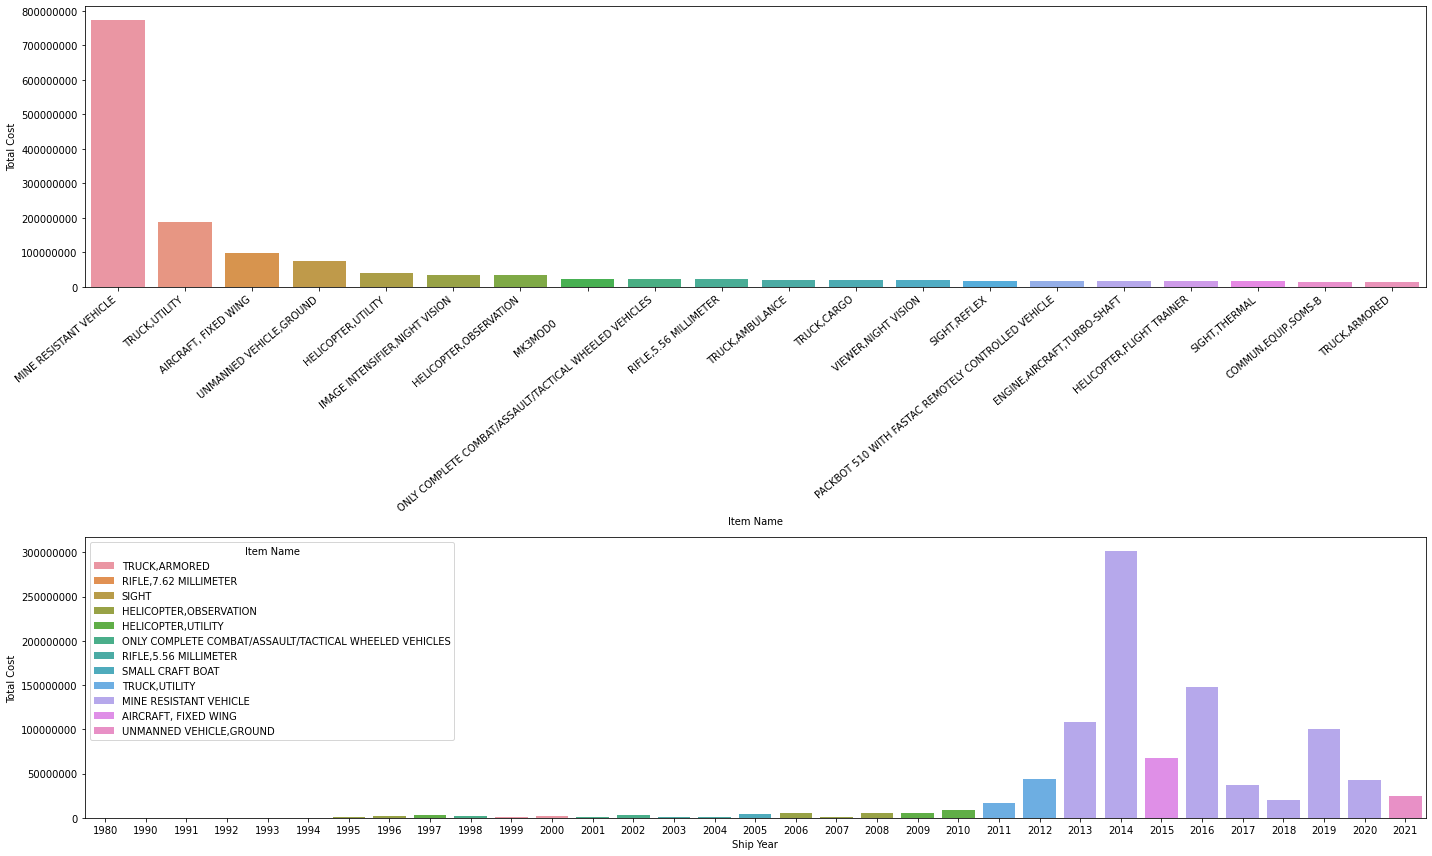

In [36]:
#Plotting most profitable of all-time vs most profitable by year

plt.subplot(2, 1, 1)
ax = sns.barplot(x="Item Name", y="Total Cost", data=acquisition_by_items[0:20], dodge=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.yaxis.get_major_formatter().set_scientific(False)

plt.subplot(2, 1, 2)
ax2 = sns.barplot(x="Ship Year", y="Total Cost", hue = "Item Name", data=acquisition_by_items_yearly, dodge=False)
ax2.yaxis.get_major_formatter().set_scientific(False)

plt.tight_layout()


### Now, we can check out what the most common items were of all time... 

In [37]:
most_common_items = df.groupby(["Item Name"], as_index=False)[['Quantity']].agg('sum')

most_common_items = most_common_items.sort_values(by=['Quantity'], ascending = False)

#Showing top 50
most_common_items.head(50)

,Item Name,Quantity
2442,"MAGAZINE,CARTRIDGE",87514
3374,"RIFLE,5.56 MILLIMETER",46843
3729,"SIGHT,REFLEX",45051
3375,"RIFLE,7.62 MILLIMETER",11146
1996,"ILLUMINATOR,INFRARED",7351
1998,"ILLUMINATOR,INTEGRATED,SMALL ARMS",6565
3458,"SANITIZER, HAND (PERSONAL SIZE)",5940
2953,"PISTOL,CALIBER .45,AUTOMATIC",5664
3728,"SIGHT,REAR",5558
3053,"POUCH,HUMAN REMAINS",5257


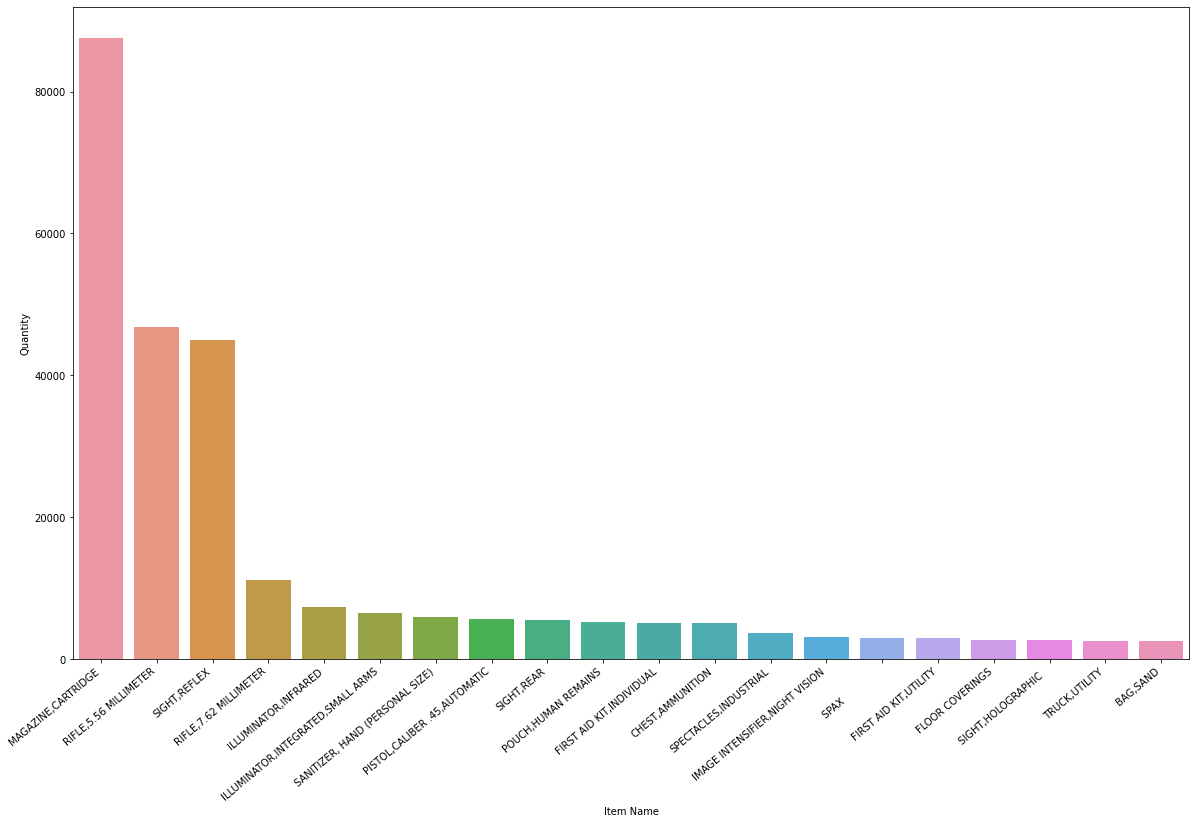

In [38]:
#Most common 20 items of all time

ax = sns.barplot(x="Item Name", y="Quantity", data=most_common_items[0:20], dodge=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.yaxis.get_major_formatter().set_scientific(False)

### ... and the most common items by year

In [39]:
most_common_items_yearly = df.groupby(["Item Name", 'Ship Year'], as_index=False)[['Quantity']].agg('sum')

most_common_items_yearly = most_common_items_yearly.sort_values(by=['Quantity'], ascending = False)

# #Showing top 50
# most_common_items_yearly.head(50)

In [40]:
most_common_items_yearly = most_common_items_yearly.drop_duplicates(subset = 'Ship Year').sort_values(by=['Ship Year'])

In [41]:
most_common_items_yearly.head(50)

,Item Name,Ship Year,Quantity
8428,"TRUCK,ARMORED",1980,1
6360,"RIFLE,7.62 MILLIMETER",1990,167
6361,"RIFLE,7.62 MILLIMETER",1991,73
6939,SIGHT,1992,3
6362,"RIFLE,7.62 MILLIMETER",1993,461
6363,"RIFLE,7.62 MILLIMETER",1994,1080
6364,"RIFLE,7.62 MILLIMETER",1995,572
6338,"RIFLE,5.56 MILLIMETER",1996,795
6339,"RIFLE,5.56 MILLIMETER",1997,1484
6340,"RIFLE,5.56 MILLIMETER",1998,3049


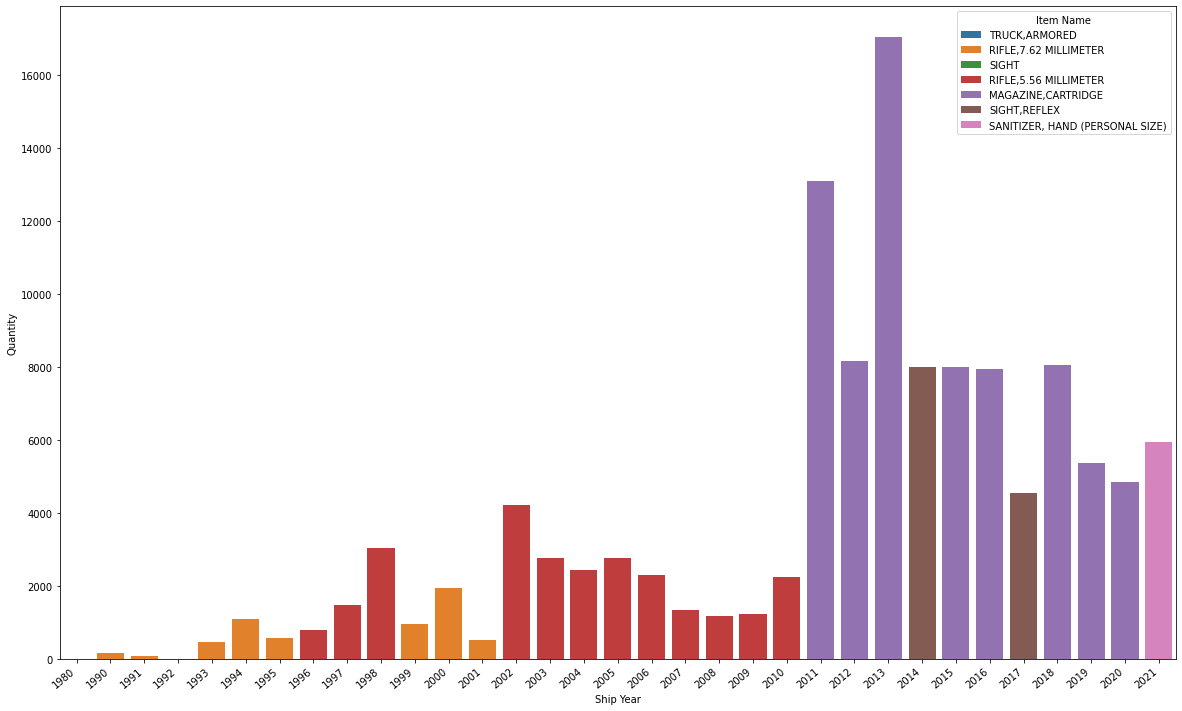

In [42]:
#Most common items by year

ax = sns.barplot(x="Ship Year", y="Quantity", hue="Item Name", data=most_common_items_yearly, dodge=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.yaxis.get_major_formatter().set_scientific(False)

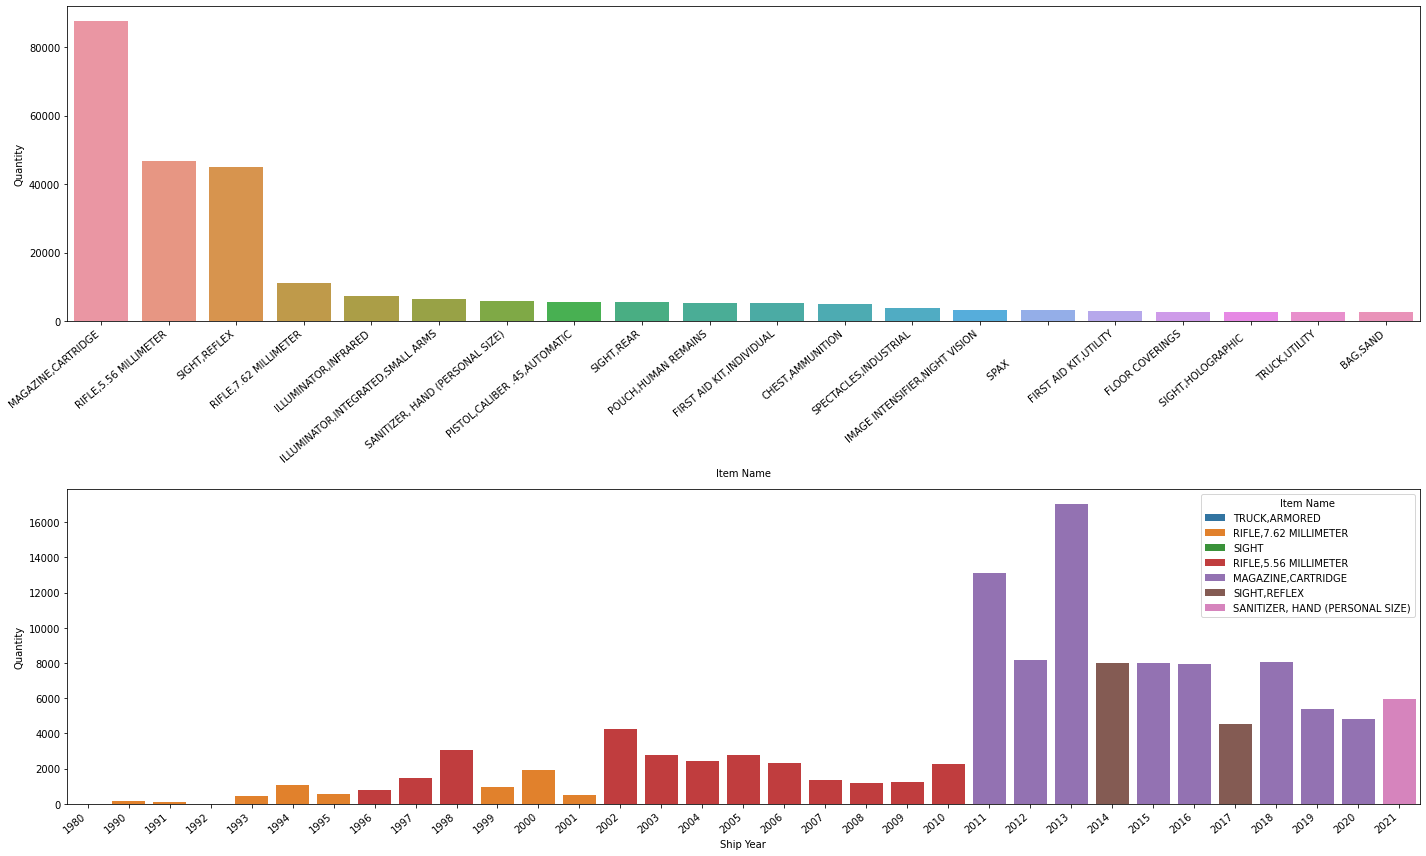

In [43]:
#Plotting most common items of all time (20) vs most common times yearly 

plt.subplot(2, 1, 1)
ax = sns.barplot(x="Item Name", y="Quantity", data=most_common_items[0:20], dodge=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.yaxis.get_major_formatter().set_scientific(False)

plt.subplot(2, 1, 2)
ax2 = sns.barplot(x="Ship Year", y="Quantity", hue="Item Name", data=most_common_items_yearly, dodge=False)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.yaxis.get_major_formatter().set_scientific(False)


plt.tight_layout()

### Looking at the trend between DEMIL Code and Total Cost

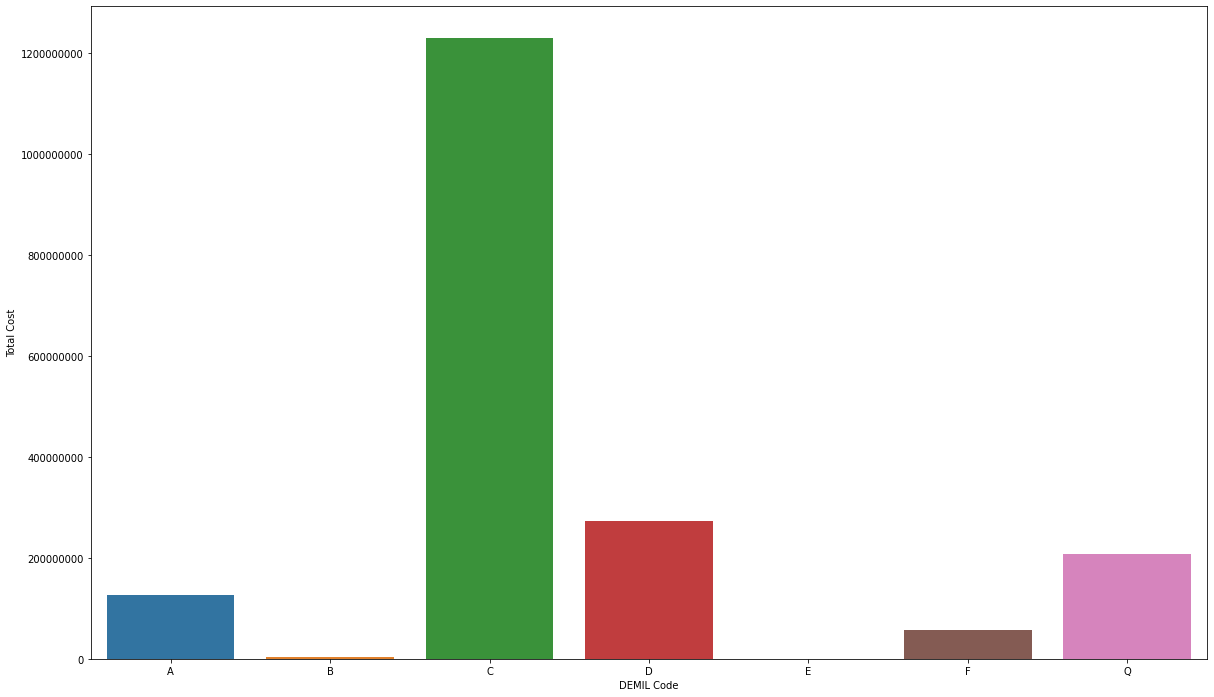

In [44]:
demil = df.groupby(["DEMIL Code"], as_index=False)[['Total Cost']].agg('sum')

ax2 = sns.barplot(x="DEMIL Code", y="Total Cost", data=demil, dodge=False)
ax2.yaxis.get_major_formatter().set_scientific(False)

#Items with DEMIL Code C profit the most, D and Q are the next most profitable.

In [45]:
# mag = df[df["DEMIL Code"] == 'C']
# mag

#Top 5 profitable items and their DEMIL Codes - MINE RESITANT VEHICLE| TRUCK,UTILITY| AIRCRAFT,FIXED WING| UNMANNED VEHICLE,GROUND| HELICOPTER,UTILITY

item1 = df[df["Item Name"] == 'MINE RESISTANT VEHICLE']
item2 = df[df["Item Name"] == 'TRUCK,UTILITY']
item3 = df[df["Item Name"] == 'AIRCRAFT, FIXED WING']
item4 = df[df["Item Name"] == 'UNMANNED VEHICLE,GROUND']
item5 = df[df["Item Name"] == 'HELICOPTER,UTILITY']

item1['DEMIL Code'].value_counts()

C    1070
D      71
Name: DEMIL Code, dtype: int64

In [46]:
item2['DEMIL Code'].value_counts()

C    2500
Q     120
A      14
Name: DEMIL Code, dtype: int64

In [47]:
item3['DEMIL Code'].value_counts()

C    8
B    5
Name: DEMIL Code, dtype: int64

In [48]:
item4['DEMIL Code'].value_counts()

Q    795
C     12
F      5
Name: DEMIL Code, dtype: int64

In [49]:
item5['DEMIL Code'].value_counts()

C    44
Name: DEMIL Code, dtype: int64

## Out of the top 5 most profitable items, 4/5 have DEMIL Code C as the majority

## Checking highest frequency items of each DEMIL Code

In [50]:
demA = df[df["DEMIL Code"] == 'A']
demA["Item Name"].value_counts()

JACKET,COLD WEATHER                   289
BOOTS,HOT WEATHER                     220
TRAILER                               220
CLOTHING, SPECIAL PURPOSE, DEMIL A    179
ALL TERRAIN VEHICLE, 4 WHEEL          174
                                     ... 
TOURNIQUET,PNEUMATIC                    1
VEHICLE MIRROR                          1
DRIVER,IMPACT,ELECTRIC,PORTABLE         1
GRINDING MACHINE,UTILITY                1
TOWELETTE,CLEANING                      1
Name: Item Name, Length: 2805, dtype: int64

In [51]:
demB = df[df["DEMIL Code"] == 'B']
demB["Item Name"].value_counts()

RADIO, TV COMM EQUIP, EXCEPT AIRBORNE       12
WEAPON ACCESSORIES                          10
GLOBAL POSITIONING SATELLITE (GPS) EQUIP     9
OPTICAL SIGHTING AND RANGING EQUIPMENT       9
BDU KNEEPAD                                  7
                                            ..
MAINTENANCE FACILITY CONTAINERIZED           1
DESC=HONDA FOURTRAX                          1
RADIO NAVIGATION EQUIP, EXCEPT AIRBORNE      1
TUBE ASSY,ANTI-ICIN                          1
BAFFLE,RESERVOIR                             1
Name: Item Name, Length: 70, dtype: int64

In [52]:
demC = df[df["DEMIL Code"] == 'C']
demC["Item Name"].value_counts()

TRUCK,UTILITY                         2500
MINE RESISTANT VEHICLE                1070
IMAGE INTENSIFIER,NIGHT VISION         736
VIEWER,NIGHT VISION                    290
HELICOPTER,OBSERVATION                 271
                                      ... 
COMMUNICATION EQP                        1
WORKSTATION,PORTABLE MULTIFUNCTION       1
REMOTE CONTROL HD                        1
INTERROGATOR SET                         1
DIRECTION FINDER SET                     1
Name: Item Name, Length: 215, dtype: int64

In [53]:
demD = df[df["DEMIL Code"] == 'D']
demD["Item Name"].value_counts()

RIFLE,5.56 MILLIMETER                            46843
RIFLE,7.62 MILLIMETER                            11146
SIGHT,REFLEX                                     10789
PISTOL,CALIBER .45,AUTOMATIC                      5664
ILLUMINATOR,INFRARED                              1738
                                                 ...  
SHIPPING AND STORAGE CONTAINER,GUIDED MISSILE        1
GAS TURBINES AND JET ENGINES, AIRCRAFT               1
PREAMPLIFIER,VIDEO                                   1
DESC=BOMB BLANKET 4X4                                1
LEG ASSEMBLY,BIPOD                                   1
Name: Item Name, Length: 789, dtype: int64

In [54]:
demE = df[df["DEMIL Code"] == 'E']
demE["Item Name"].value_counts()

JACKET,COLD WEATHER                       17
COVERALLS,FLYERS'                         17
TROUSERS,COLD WEATHER                     16
JACKET,EXTREME COLD WEATHER               11
COVERALLS,COMBAT VEHICLE CREWMEMBER'S     10
PONCHO,WET WEATHER                         8
TROUSERS,WET WEATHER                       8
COVERALLS,WOMEN'S                          7
PARKA,COLD WEATHER                         7
PARKA,WET WEATHER                          6
COAT,COMBAT                                4
COVERALLS,MECHANICS,CAMOUFLAGE PATTERN     4
SHIRT,COMBAT,COLD WEATHER                  4
SUIT,EXPLOSIVE ORDNANCE DISPOSAL           2
TROUSERS,COMBAT                            2
PARKA,CAMOUFLAGE                           2
COAT,FIREMANS,BDU                          2
PARKA, WET WEATHER (BDU)                   2
COVER,HELMET                               1
TROUSERS,FLAME RESISTANT                   1
HAT,CAMOUFLAGE PATTERN                     1
HOOD,FLYER'S                               1
SHIRT,MAN'

In [55]:
demF = df[df["DEMIL Code"] == 'F']
demF["Item Name"].value_counts()

NIGHT VISION GOGGLE                      1847
SIGHT,THERMAL                            1203
VIEWER,NIGHT VISION                       970
IMAGE INTENSIFIER,NIGHT VISION            525
GOGGLES,NIGHTVISIO                        229
                                         ... 
SURVIVAL KIT,INDIVIDUAL                     1
INSTRUMENT REPAIR SHOP,TRUCK MOUNTED        1
BEACON,SONAR                                1
CYLINDER,COMPRESSED GAS,AIR TECHNICAL       1
NIGHT VISION SYSTEM,CAMERA(NVSC)            1
Name: Item Name, Length: 70, dtype: int64

In [56]:
demQ = df[df["DEMIL Code"] == 'Q']
demQ["Item Name"].value_counts()

UNMANNED VEHICLE,GROUND                                795
PACKBOT 510 WITH FASTAC REMOTELY CONTROLLED VEHICLE    212
TRUCK,UTILITY                                          120
BORE LIGHT SYSTEM,LASER                                107
SIGHT,REFLEX                                            94
                                                      ... 
SLING,AIRCRAFT MAINTENANCE                               1
INSERT,OPTICAL,CHEMICAL-BIOLOGICAL MASK                  1
ADAPTER,PUMP,FUEL TRANSFER                               1
TRAINING KIT,HEMORRHAGE CONTROL                          1
PINTLE,CAP,SERVOCYL                                      1
Name: Item Name, Length: 1294, dtype: int64

##  Notably, DEMIL Code C has a high frequency of Truck,Utility and Mine Resistant Vehicles which were determined to be the two most profitable items
##  Code D has a very high frequency of rifles and rifle related gear, however the aquisition cost of these items is not as a high as the items found in class C.

<AxesSubplot:xlabel='DEMIL Code', ylabel='size'>

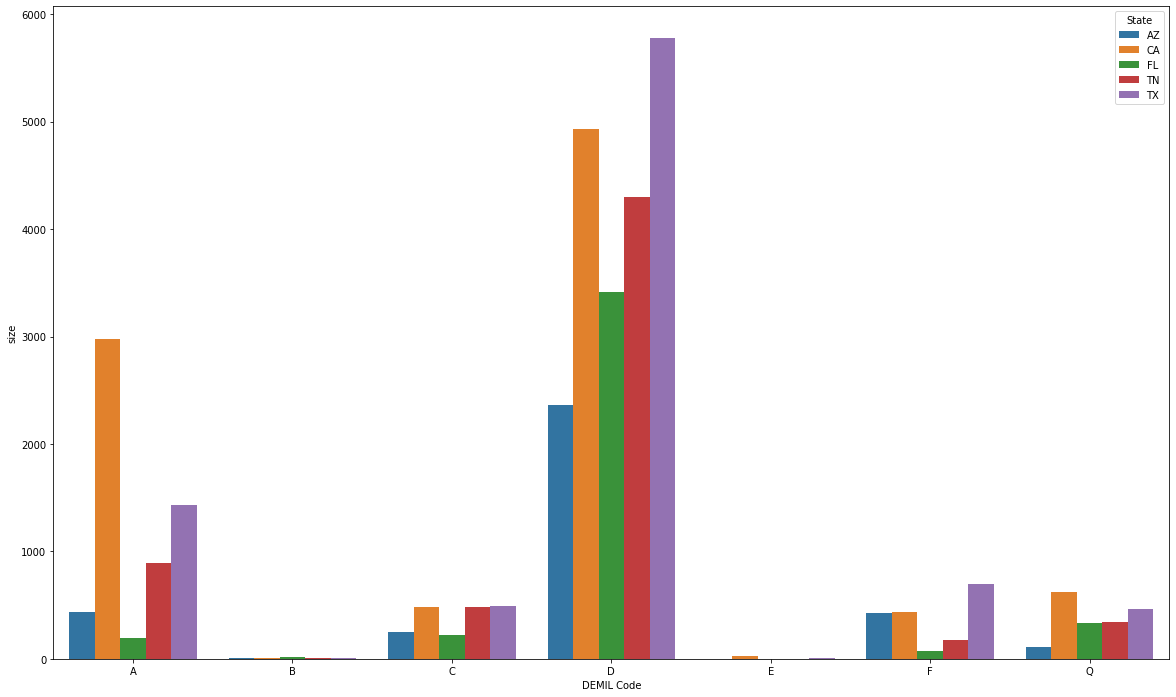

In [57]:
#Top 5 spenders buy item types that mostly fit into DEMIL Code D.

top_5_spenders = df[(df["State"] == 'TX') | (df["State"] == 'CA') | (df["State"] == 'TN') | (df["State"] == 'FL') | (df["State"] == 'AZ')]
top_5_spenders = top_5_spenders.groupby(['State', 'DEMIL Code'],  as_index=False).size() #[['DEMIL Code']].agg('count')
top_5_spenders

sns.barplot(x = "DEMIL Code", y = "size", hue = "State",  data=top_5_spenders)

# Outliers

### Box Plot

<AxesSubplot:xlabel='Total Cost'>

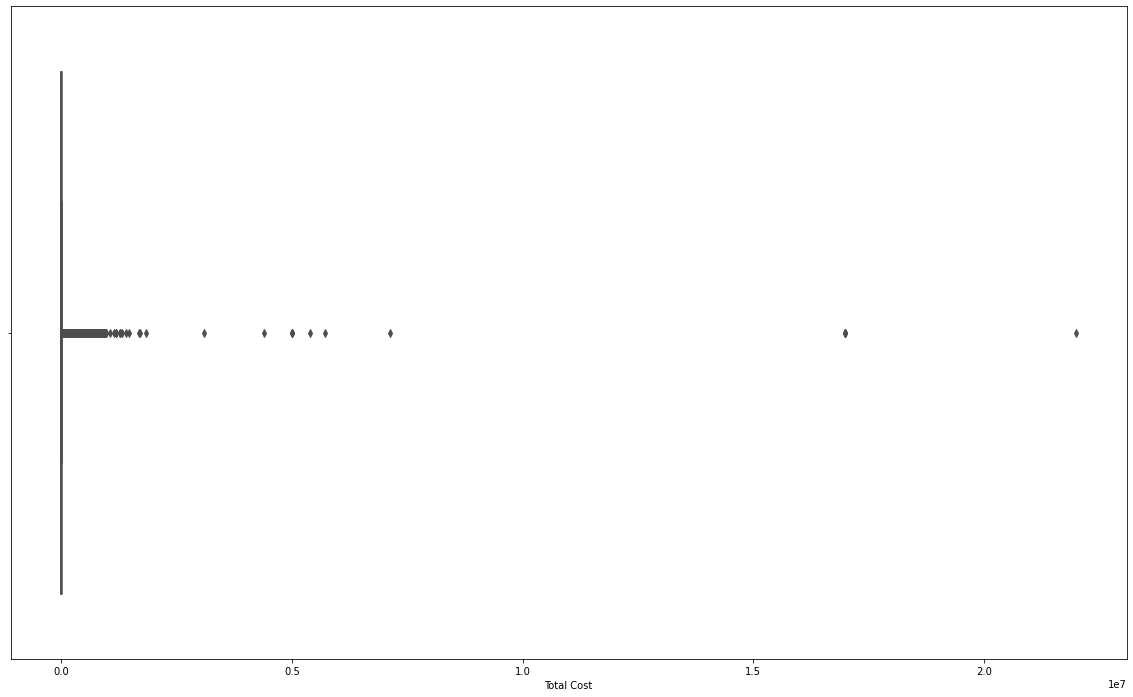

In [58]:
sns.boxplot(x = 'Total Cost', data = df, palette='flare')

### IQR Method

In [59]:
Q1 = df['Total Cost'].quantile(0.25)
Q3 = df['Total Cost'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1679.0525


In [60]:
upper = np.where(df['Total Cost'] >= (Q3+1.5*IQR))

In [61]:
df_no_outliers = df.drop(upper[0])

In [62]:
df_no_outliers.describe()

,Quantity,Acquisition Value,Total Cost,DEMIL IC,Ship Year
count,107012.00,107012.00,107012.00,99927.00,107012.00
mean,3.33,492.42,639.15,1.10,2010.09
std,17.34,680.10,825.96,0.59,7.30
min,0.00,0.00,0.00,0.00,1990.00
25%,1.00,120.00,138.00,1.00,2004.00
50%,1.00,333.00,499.00,1.00,2011.00
75%,1.00,499.00,502.12,1.00,2015.00
max,1800.00,4336.00,4342.59,7.00,2021.00


## Predicting DEMIL Code

In [298]:
df2 = df.drop(['Agency Name', 'NSN', 'Quantity', 'Acquisition Value', 'Ship Date', 'Station Type', 'Ship Year'], axis = 1)

In [299]:
df2 = df2[["State", "Item Name", "UI", "Total Cost", "DEMIL IC", "DEMIL Code"]]

In [301]:
df2.head()

,State,Item Name,UI,Total Cost,DEMIL IC,DEMIL Code
0,AL,BALLISTIC BLANKET KIT,Kit,158715.90,1.00,D
1,AL,OPTICAL SIGHTING AND RANGING EQUIPMENT,Each,245.88,nan,D
2,AL,MINE RESISTANT VEHICLE,Each,658000.00,1.00,C
3,AL,"SIGHT,REFLEX",Each,2997.00,1.00,D
4,AL,"ILLUMINATOR,INFRARED",Each,9260.00,1.00,D


In [251]:
df2 = df2[df2['Item Name'].notnull()]
df2 = df2[df2['UI'].notnull()]

In [252]:
#10 to denote Blank 
df2['DEMIL IC'] = df2['DEMIL IC'].fillna(10)

In [253]:
from sklearn.preprocessing import LabelEncoder

le =  LabelEncoder()

df2['State'] = le.fit_transform(df2['State'])
df2['Item Name'] = le.fit_transform(df2['Item Name'])
df2['UI'] = le.fit_transform(df2['UI'])
df2['DEMIL Code'] = le.fit_transform(df2['DEMIL Code'])

In [254]:
df2.head()

,State,Item Name,UI,Total Cost,DEMIL IC,DEMIL Code
0,1,253,17,158715.90,1.00,3
1,1,2750,13,245.88,10.00,3
2,1,2554,13,658000.00,1.00,2
3,1,3729,13,2997.00,1.00,3
4,1,1996,13,9260.00,1.00,3


In [255]:
X = df2.iloc[:, :5].values
y = df2.iloc[:, 5].values

In [256]:
y

array([3, 3, 2, ..., 3, 3, 3])

In [257]:
# ohe = OneHotEncoder()
# le = LabelEncoder()

# X = le.fit_transform(X)
# y = le.fit_transform(y)

In [258]:
# X = X.astype(str)

In [259]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xn = sc.fit_transform(X)

In [260]:
from keras.utils import np_utils

y = np_utils.to_categorical(y,num_classes=7)

In [261]:
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.3, random_state=42)

In [196]:
X_train.shape

(91670, 5)

In [197]:
print(X[0:2]), y[0:2]

[[1.000000e+00 2.530000e+02 1.700000e+01 1.587159e+05 1.000000e+00]
 [1.000000e+00 2.750000e+03 1.300000e+01 2.458800e+02 1.000000e+01]]


(None,
 array([[0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.]], dtype=float32))

In [198]:
# ohe = OneHotEncoder()

# X_train_encoded = ohe.fit_transform(X_train)
# # X_train_encoded = ohe.transform(X_train)
# X_test_encoded = ohe.transform(X_test)

##  Testing model

In [225]:
model = Sequential()

model.add(Dense(100, input_shape = (5,), activation = 'relu'))
model.add(Dense(70, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(7, activation = 'softmax'))

In [226]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [201]:
history = model.fit(X_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.4777 - accuracy: 0.8217
Epoch 2/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.3876 - accuracy: 0.8603
Epoch 3/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.3650 - accuracy: 0.8681
Epoch 4/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.3445 - accuracy: 0.8721
Epoch 5/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.3216 - accuracy: 0.8773
Epoch 6/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.3032 - accuracy: 0.8833
Epoch 7/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.2951 - accuracy: 0.8866
Epoch 8/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.2871 - accuracy: 0.8915
Epoch 9/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.2806 - accuracy: 0.8941
Epoch 10/100
1834/1834 [==============================] - 2s 1ms/step - l

1834/1834 [==============================] - 2s 1ms/step - loss: 0.2016 - accuracy: 0.9254
Epoch 80/100
1834/1834 [==============================] - 2s 1ms/step - loss: 0.2061 - accuracy: 0.9236
Epoch 81/100
1834/1834 [==============================] - 2s 975us/step - loss: 0.2019 - accuracy: 0.9241
Epoch 82/100
1834/1834 [==============================] - 2s 972us/step - loss: 0.2047 - accuracy: 0.9230
Epoch 83/100
1834/1834 [==============================] - 2s 988us/step - loss: 0.2031 - accuracy: 0.9241
Epoch 84/100
1834/1834 [==============================] - 2s 952us/step - loss: 0.2050 - accuracy: 0.9232
Epoch 85/100
1834/1834 [==============================] - 2s 962us/step - loss: 0.1986 - accuracy: 0.9261
Epoch 86/100
1834/1834 [==============================] - 2s 996us/step - loss: 0.2013 - accuracy: 0.9243
Epoch 87/100
1834/1834 [==============================] - 2s 952us/step - loss: 0.2034 - accuracy: 0.9236
Epoch 88/100
1834/1834 [==============================] - 2s 93

In [202]:
results = model.evaluate(X_test, y_test)

1228/1228 [==============================] - 1s 463us/step - loss: 0.2026 - accuracy: 0.9270


In [203]:
y_pred = model.predict(X_test)

pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [204]:
pred[0:20]

[3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3]

In [205]:
test[0:20]

[3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3]

In [206]:
a = accuracy_score(pred, test)
print("Accuracy is: ", a*100)

Accuracy is:  92.69751578090002


In [207]:
print(f"Test set loss: {results[0]:.0%}")
print(f"Accuracy: {results[1]:.0%}")

Test set loss: 20%
Accuracy: 93%


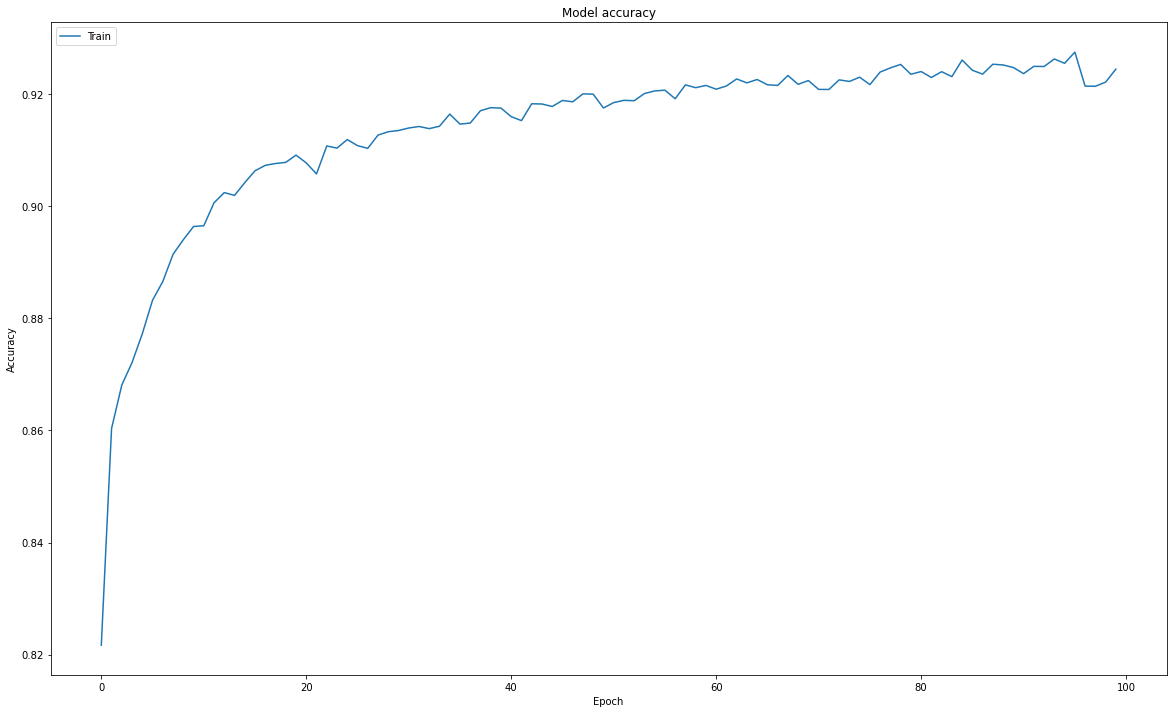

In [208]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Model 1 - Epochs can be reduce to around 80, as the improvement of accuracy from that point on is marginal

-Keeping layers and nodes the same, only changing the epoch and batch size

In [227]:
history = model.fit(X_train, y_train, epochs=80, batch_size=128)

Epoch 1/80
717/717 [==============================] - 1s 1ms/step - loss: 0.5596 - accuracy: 0.8005
Epoch 2/80
717/717 [==============================] - 1s 1ms/step - loss: 0.3956 - accuracy: 0.8540
Epoch 3/80
717/717 [==============================] - 1s 1ms/step - loss: 0.3747 - accuracy: 0.8661
Epoch 4/80
717/717 [==============================] - 1s 1ms/step - loss: 0.3633 - accuracy: 0.8707
Epoch 5/80
717/717 [==============================] - 1s 1ms/step - loss: 0.3504 - accuracy: 0.8747
Epoch 6/80
717/717 [==============================] - 1s 1ms/step - loss: 0.3323 - accuracy: 0.8758
Epoch 7/80
717/717 [==============================] - 1s 1ms/step - loss: 0.3113 - accuracy: 0.8827
Epoch 8/80
717/717 [==============================] - 1s 1ms/step - loss: 0.3068 - accuracy: 0.8833
Epoch 9/80
717/717 [==============================] - 1s 1ms/step - loss: 0.2947 - accuracy: 0.8867
Epoch 10/80
717/717 [==============================] - 1s 1ms/step - loss: 0.2839 - accuracy: 0.8911

In [228]:
results = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
    
print(f"Test set loss: {results[0]:.0%}")
print(f"Accuracy: {results[1]:.0%}")

1228/1228 [==============================] - 1s 458us/step - loss: 0.1944 - accuracy: 0.9256
Test set loss: 19%
Accuracy: 93%


In [ ]:
#Improvement in test set loss can be seen here after epoch and batch size is increased

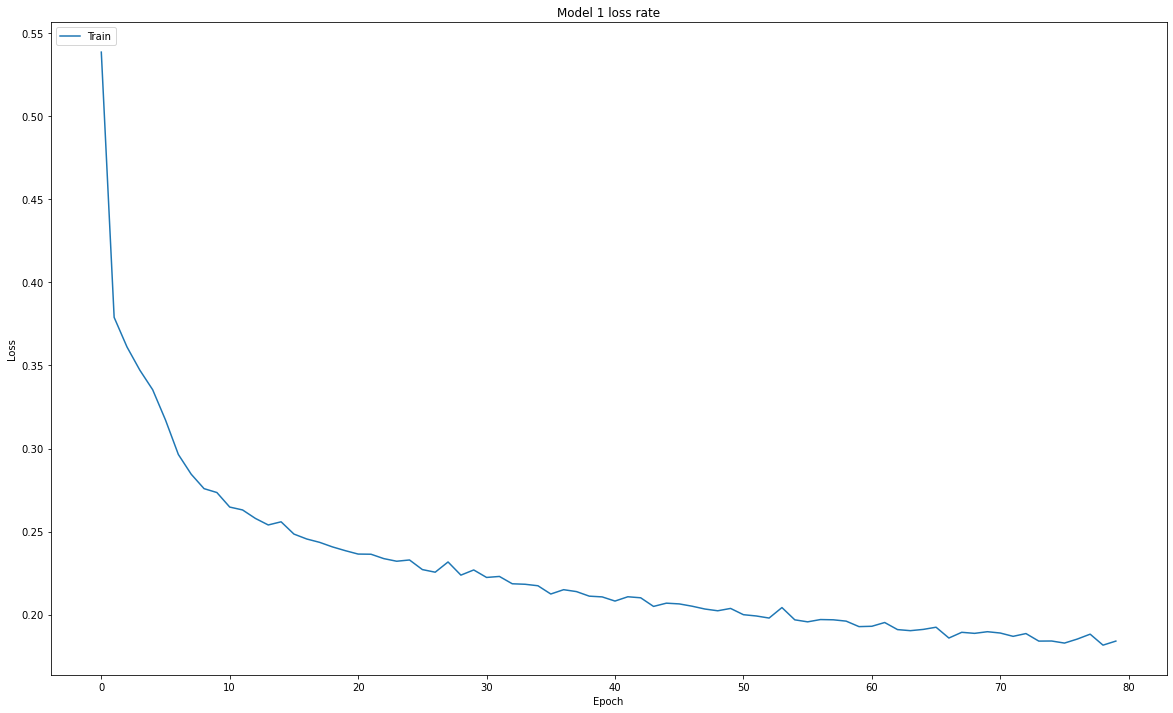

In [86]:
plt.plot(history2.history['loss'])
plt.title('Model 1 loss rate')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [229]:
model.save('first.model')
model1 = tf.keras.models.load_model('first.model')

INFO:tensorflow:Assets written to: first.model\assets


## Model 2 - Now lets change the model and try different numbers of layers and nodes

In [230]:
model = Sequential()

model.add(Dense(512, input_shape = (5,), activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(7, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [231]:
history = model.fit(X_train, y_train, epochs=80, batch_size=128)

Epoch 1/80
717/717 [==============================] - 2s 2ms/step - loss: 0.5487 - accuracy: 0.7941
Epoch 2/80
717/717 [==============================] - 2s 2ms/step - loss: 0.3809 - accuracy: 0.8670
Epoch 3/80
717/717 [==============================] - 2s 2ms/step - loss: 0.3620 - accuracy: 0.8700
Epoch 4/80
717/717 [==============================] - 1s 2ms/step - loss: 0.3448 - accuracy: 0.8773
Epoch 5/80
717/717 [==============================] - 1s 2ms/step - loss: 0.3306 - accuracy: 0.8810
Epoch 6/80
717/717 [==============================] - 1s 2ms/step - loss: 0.3182 - accuracy: 0.8842: 0s - loss: 0.3191 - accuracy: 
Epoch 7/80
717/717 [==============================] - 1s 2ms/step - loss: 0.3033 - accuracy: 0.8877
Epoch 8/80
717/717 [==============================] - 1s 2ms/step - loss: 0.2849 - accuracy: 0.8920
Epoch 9/80
717/717 [==============================] - 1s 2ms/step - loss: 0.2685 - accuracy: 0.8993
Epoch 10/80
717/717 [==============================] - 1s 2ms/step -

In [232]:
results = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
    
print(f"Test set loss: {results[0]:.0%}")
print(f"Accuracy: {results[1]:.0%}")

1228/1228 [==============================] - 1s 559us/step - loss: 0.1768 - accuracy: 0.9380
Test set loss: 18%
Accuracy: 94%


In [233]:
model.save('second.model')
model2 = tf.keras.models.load_model('second.model')

INFO:tensorflow:Assets written to: second.model\assets


## We incremented the number of layers one by one and increased the number of nodes at the start by a factor of 2. 
An increase in results were seen up until 7 layers (not including output layer). After that the results plateaud at 94% accuracy around 17/18% test set loss.

## Model 3 - Now lets try changing the train vs test percentage and see if that has any effect.
 - Tested up till now with a 70/30 split

In [234]:
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.1, random_state=42)

model = Sequential()

model.add(Dense(512, input_shape = (5,), activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(7, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [235]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128)

Epoch 1/100
921/921 [==============================] - 2s 2ms/step - loss: 0.5432 - accuracy: 0.8089
Epoch 2/100
921/921 [==============================] - 2s 2ms/step - loss: 0.3829 - accuracy: 0.8650
Epoch 3/100
921/921 [==============================] - 2s 2ms/step - loss: 0.3595 - accuracy: 0.8735
Epoch 4/100
921/921 [==============================] - 2s 2ms/step - loss: 0.3433 - accuracy: 0.8778
Epoch 5/100
921/921 [==============================] - 2s 2ms/step - loss: 0.3276 - accuracy: 0.8822
Epoch 6/100
921/921 [==============================] - 2s 2ms/step - loss: 0.3104 - accuracy: 0.8867
Epoch 7/100
921/921 [==============================] - 2s 2ms/step - loss: 0.2926 - accuracy: 0.8915
Epoch 8/100
921/921 [==============================] - 2s 2ms/step - loss: 0.2750 - accuracy: 0.8971
Epoch 9/100
921/921 [==============================] - 2s 2ms/step - loss: 0.2634 - accuracy: 0.9018
Epoch 10/100
921/921 [==============================] - 2s 2ms/step - loss: 0.2544 - accura

In [236]:
results = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
    
print(f"Test set loss: {results[0]:.0%}")
print(f"Accuracy: {results[1]:.0%}")

410/410 [==============================] - 0s 564us/step - loss: 0.1650 - accuracy: 0.9414
Test set loss: 16%
Accuracy: 94%


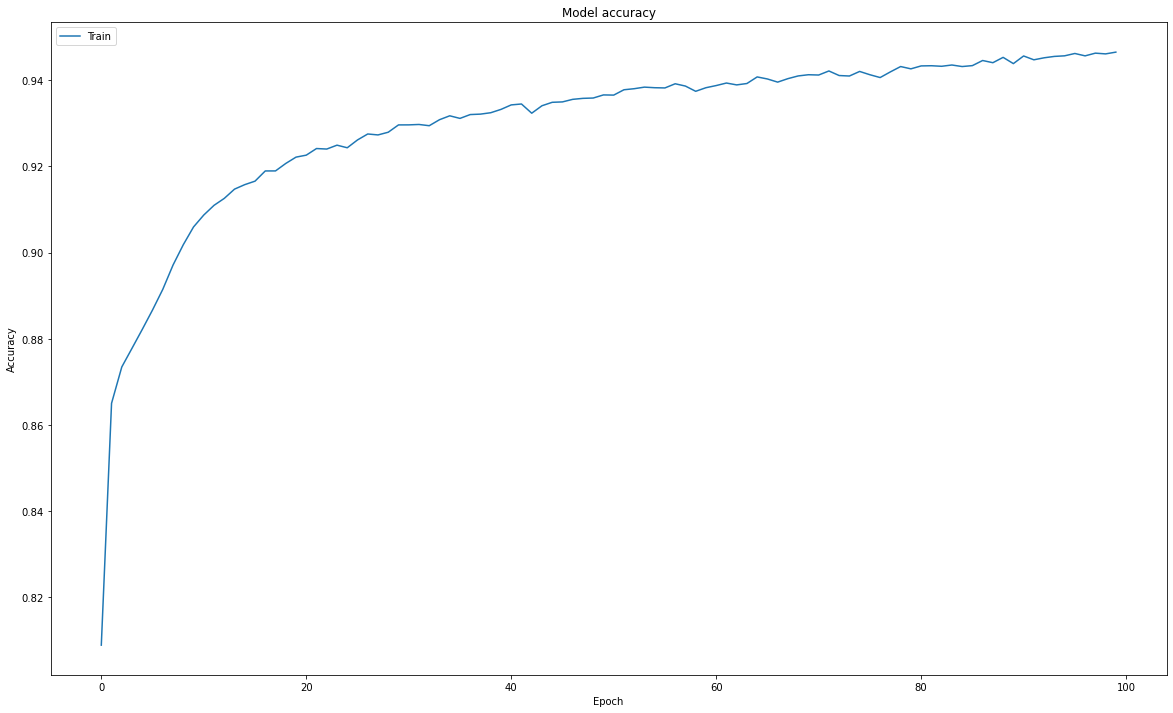

In [237]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Results improve when a 90/10 split is used alongside an increase of epoch to 100. The test loss reduces by 1%.

In [238]:
model.save('third.model')
model3 = tf.keras.models.load_model('third.model')

INFO:tensorflow:Assets written to: third.model\assets


## Model 4 - Lets try changing around the columns in the X to include total cost, acquisition value and quantity and ship year

In [297]:
df2 = df.drop(['Agency Name', 'NSN', 'Ship Date', 'Station Type'], axis = 1)
df2 = df2[["State", "Item Name", "UI", "Quantity", "Acquisition Value", "Total Cost", "Ship Year", "DEMIL IC", "DEMIL Code"]]
df2 = df2[df2['Item Name'].notnull()]
df2 = df2[df2['UI'].notnull()]
df2['DEMIL IC'] = df2['DEMIL IC'].fillna(10)

le =  LabelEncoder()

df2['State'] = le.fit_transform(df2['State'])
df2['Item Name'] = le.fit_transform(df2['Item Name'])
df2['UI'] = le.fit_transform(df2['UI'])
df2['DEMIL Code'] = le.fit_transform(df2['DEMIL Code'])

df2.head()

,State,Item Name,UI,Quantity,Acquisition Value,Total Cost,Ship Year,DEMIL IC,DEMIL Code
0,1,253,17,10,15871.59,158715.90,2018,1.00,3
1,1,2750,13,1,245.88,245.88,2016,10.00,3
2,1,2554,13,1,658000.00,658000.00,2016,1.00,2
3,1,3729,13,9,333.00,2997.00,2016,1.00,3
4,1,1996,13,10,926.00,9260.00,2017,1.00,3


In [282]:
X = df2.iloc[:, :8].values
y = df2.iloc[:, 8].values

In [283]:
sc = StandardScaler()
Xn = sc.fit_transform(X)

y = np_utils.to_categorical(y,num_classes=7)

In [284]:
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.1, random_state=42)

model = Sequential()

model.add(Dense(512, input_shape = (8,), activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(7, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [243]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128)

Epoch 1/100
921/921 [==============================] - 2s 2ms/step - loss: 0.3704 - accuracy: 0.8754
Epoch 2/100
921/921 [==============================] - 2s 2ms/step - loss: 0.1994 - accuracy: 0.9370
Epoch 3/100
921/921 [==============================] - 2s 2ms/step - loss: 0.1792 - accuracy: 0.9426
Epoch 4/100
921/921 [==============================] - 2s 2ms/step - loss: 0.1678 - accuracy: 0.9464
Epoch 5/100
921/921 [==============================] - 2s 2ms/step - loss: 0.1560 - accuracy: 0.9496
Epoch 6/100
921/921 [==============================] - 2s 2ms/step - loss: 0.1441 - accuracy: 0.9542
Epoch 7/100
921/921 [==============================] - 2s 2ms/step - loss: 0.1378 - accuracy: 0.9560
Epoch 8/100
921/921 [==============================] - 2s 2ms/step - loss: 0.1326 - accuracy: 0.9573
Epoch 9/100
921/921 [==============================] - 2s 2ms/step - loss: 0.1283 - accuracy: 0.9593
Epoch 10/100
921/921 [==============================] - 2s 2ms/step - loss: 0.1218 - accura

In [244]:
results = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
    
print(f"Test set loss: {results[0]:.0%}")
print(f"Training Accuracy: {results[1]:.0%}")

410/410 [==============================] - 0s 598us/step - loss: 0.0819 - accuracy: 0.9793
Test set loss: 8%
Training Accuracy: 98%


We see a drastic improvement in accuracy by 4% and a drop in loss rate by 8%

In [245]:
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

a = accuracy_score(pred, test)
print("Testing Accuracy is: ", a*100)

Testing Accuracy is:  97.9306658521686


In [246]:
model.save('fourth.model')
model4 = tf.keras.models.load_model('fourth.model')

INFO:tensorflow:Assets written to: fourth.model\assets


## Comparing Classification reports and confusion matrices of the 4 models

MODEL 1 - Random layers and nodes, epoch=100, batch size = 50, X features are "State", "Item Name", "UI", "Total Cost", "DEMIL IC", train test split is 70/30

In [264]:
y_test_arg=np.argmax(y_test,axis=1)
y_pred = np.argmax(model1.predict(X_test),axis=1)

print("Classification report: ")
print(classification_report(y_test_arg,y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      5512
           1       0.00      0.00      0.00        41
           2       0.87      0.81      0.84      2129
           3       0.96      0.96      0.96     28043
           4       0.00      0.00      0.00        40
           5       0.83      0.86      0.85      1863
           6       0.99      0.99      0.99      1660

    accuracy                           0.93     39288
   macro avg       0.64      0.64      0.64     39288
weighted avg       0.92      0.93      0.92     39288



In [267]:
print("Confusion matrix: ")
print(multilabel_confusion_matrix(y_test_arg,y_pred))

Confusion matrix: 
[[[32634  1142]
  [ 1017  4495]]

 [[39247     0]
  [   41     0]]

 [[36907   252]
  [  394  1735]]

 [[10048  1197]
  [ 1167 26876]]

 [[39248     0]
  [   40     0]]

 [[37105   320]
  [  252  1611]]

 [[37617    11]
  [   11  1649]]]


MODEL 2 - 7 layers and descending nodes count, epoch=80, batch size = 128, X features are "State", "Item Name", "UI", "Total Cost", "DEMIL IC", train test split is 70/30

In [268]:
y_test_arg=np.argmax(y_test,axis=1)
y_pred = np.argmax(model2.predict(X_test),axis=1)

print("Classification report: ")
print(classification_report(y_test_arg,y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      5512
           1       0.00      0.00      0.00        41
           2       0.87      0.85      0.86      2129
           3       0.96      0.97      0.97     28043
           4       0.36      0.10      0.16        40
           5       0.87      0.90      0.89      1863
           6       0.99      0.99      0.99      1660

    accuracy                           0.94     39288
   macro avg       0.70      0.66      0.67     39288
weighted avg       0.94      0.94      0.94     39288



In [269]:
print("Confusion matrix: ")
print(multilabel_confusion_matrix(y_test_arg,y_pred))

Confusion matrix: 
[[[32911   865]
  [  918  4594]]

 [[39245     2]
  [   41     0]]

 [[36886   273]
  [  310  1819]]

 [[10217  1028]
  [  934 27109]]

 [[39241     7]
  [   36     4]]

 [[37176   249]
  [  183  1680]]

 [[37616    12]
  [   14  1646]]]


MODEL 3 - 7 layers and descending nodes count, epoch=100, batch size = 128, X features are "State", "Item Name", "UI", "Total Cost", "DEMIL IC", train test split is 90/10

In [270]:
y_test_arg=np.argmax(y_test,axis=1)
y_pred = np.argmax(model3.predict(X_test),axis=1)

print("Classification report: ")
print(classification_report(y_test_arg,y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      5512
           1       0.50      0.02      0.05        41
           2       0.89      0.87      0.88      2129
           3       0.98      0.96      0.97     28043
           4       0.33      0.07      0.12        40
           5       0.89      0.91      0.90      1863
           6       0.99      1.00      0.99      1660

    accuracy                           0.95     39288
   macro avg       0.77      0.68      0.68     39288
weighted avg       0.95      0.95      0.95     39288



In [271]:
print("Confusion matrix: ")
print(multilabel_confusion_matrix(y_test_arg,y_pred))

Confusion matrix: 
[[[32687  1089]
  [  474  5038]]

 [[39246     1]
  [   40     1]]

 [[36931   228]
  [  285  1844]]

 [[10646   599]
  [ 1142 26901]]

 [[39242     6]
  [   37     3]]

 [[37208   217]
  [  164  1699]]

 [[37618    10]
  [    8  1652]]]


MODEL 4 - 7 layers and descending nodes count, epoch=100, batch size = 128, X features are "State", "Item Name", "UI", "Quantity", "Acquisition Value", "Total Cost", "Ship Year", "DEMIL IC", train test split is 90/10

In [277]:
y_test_arg=np.argmax(y_test,axis=1)
y_pred = np.argmax(model4.predict(X_test),axis=1)

print("Classification report: ")
print(classification_report(y_test_arg,y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1806
           1       0.23      0.27      0.25        11
           2       0.93      0.90      0.91       706
           3       0.99      0.99      0.99      9339
           4       0.50      0.57      0.53         7
           5       0.96      0.95      0.95       637
           6       1.00      0.98      0.99       590

    accuracy                           0.98     13096
   macro avg       0.79      0.81      0.80     13096
weighted avg       0.98      0.98      0.98     13096



In [278]:
print("Confusion matrix: ")
print(multilabel_confusion_matrix(y_test_arg,y_pred))

Confusion matrix: 
[[[11217    73]
  [   29  1777]]

 [[13075    10]
  [    8     3]]

 [[12339    51]
  [   70   636]]

 [[ 3653   104]
  [  117  9222]]

 [[13085     4]
  [    3     4]]

 [[12432    27]
  [   34   603]]

 [[12504     2]
  [   10   580]]]
